Zmierz się z problemem identyfikacji rodzaju szkła. W tym celu wykorzystaj jeden ze zbiorów danych
UCI - GLASS. Zadania powinny być wykonane z pomocą Pythona i/lub WEKI. Punktacja:
1. eksploracja danych – przedstaw podstawowe dane statystyczne i uwagi dotyczące cech i etykiet
zbioru danych. (10 punktów)
2. przygotowanie danych – podziel dane na zestaw uczący i walidacyjny (alternatywnie użyj walidacji krzyżowej), zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)
Bonus – usuń 5% wartości cech i przygotuj dane stosując metody radzenia sobie z brakującymi
danymi. (5 punktów)
3. klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)
4. ocena klasyfikacji – do porównania wyników różnego typu przygotowania danych oraz wykorzystanego klasyfikatora użyj poznanych metryk oceny klasyfikacji i zinterpretuj wyniki. (20
punktów)
4
Do zadania przygotuj raport zawierający krótki opis wszystkich wykonywanych kroków oraz rezultatów zadania (najlepiej zebranych tabeli) wraz z interpretacją. W raporcie wskaż wykorzystane
materiały źródłowe oraz krótko opisz biblioteki wykorzystane przy implementacji. Raport wyślij prowadzącemu przynajmniej na 24 godziny przed oddaniem listy.


Importowanie danych

In [163]:
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
# downolad and save csv file
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
if 'glass_data.csv' in os.listdir(): # check if file exists in current directory if not download it
    glass_data = pd.read_csv('glass_data.csv')
else:
    glass_data = pd.read_csv(data_url, names=column_names)
    glass_data.to_csv('glass_data.csv', index=False)


print(glass_data.head(20))

    Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5    6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6    7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7    8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8    9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  13  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  14

eksploracja danych

In [164]:
glass_data.shape

(214, 11)

dataset ma 214 wierszy i 10 kolumn

In [165]:
glass_data.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

dataset nie ma brakujących danych

In [166]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [167]:
glass_data.describe()

Id          RI          Na          Mg          Al          Si   
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000  \
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.122500    8.240000    0.000000    0.000000    1.000000  
50%      0.555000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.172500    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

pokaz type

In [168]:
print(glass_data['Type'].value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


<Axes: xlabel='Type', ylabel='count'>

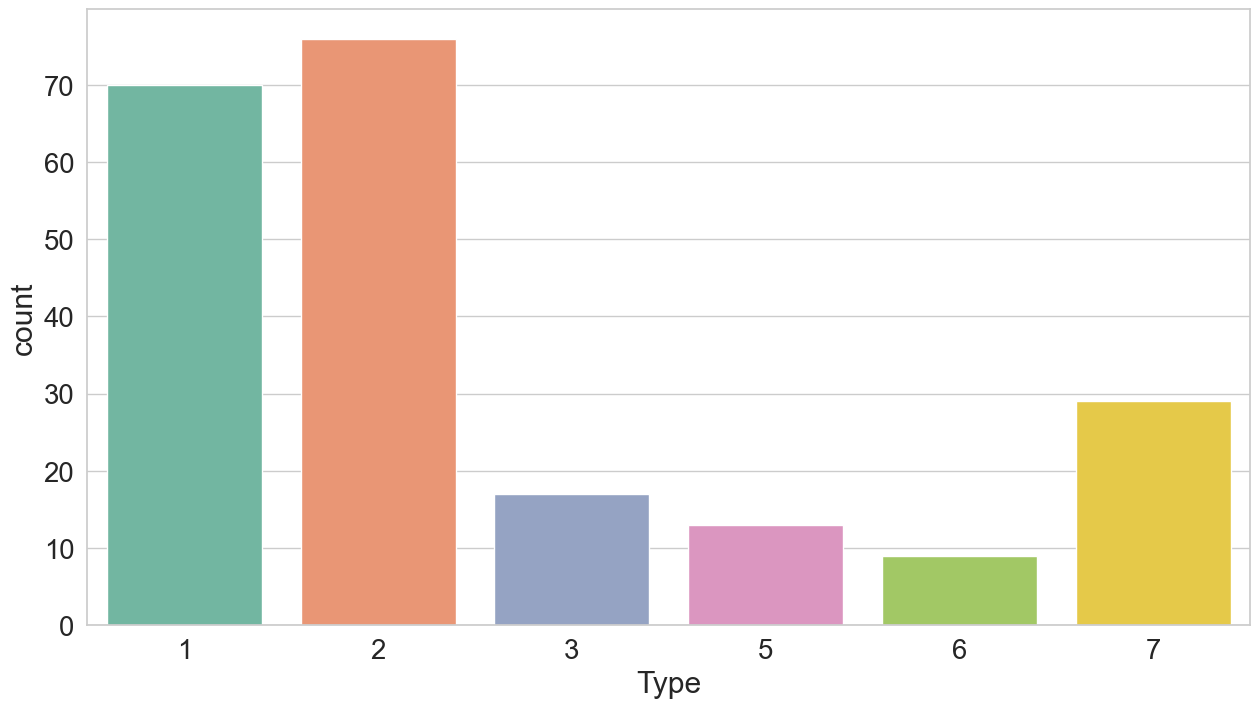

In [169]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x="Type", data=glass_data, palette="Set2")

wynioski z eksploracji danych:
Powyższe statystyki pokazują, że dane we wszystkich atrybutach nie są w tym samym zakresie, więc najpierw znormalizujemy dane

przygotowanie danych

Usuwanie niepotrzebnej kolumny Id

In [170]:
glass_data.drop(['Id'], axis=1, inplace=True)
glass_data.head(3)

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1

Odseparowanie kolumny klasy od reszty danych

In [171]:
y = glass_data['Type']

X = glass_data.drop('Type', axis=1)

X.shape

(214, 9)

In [172]:
type(X)

pandas.core.frame.DataFrame

In [173]:
y.shape

(214,)

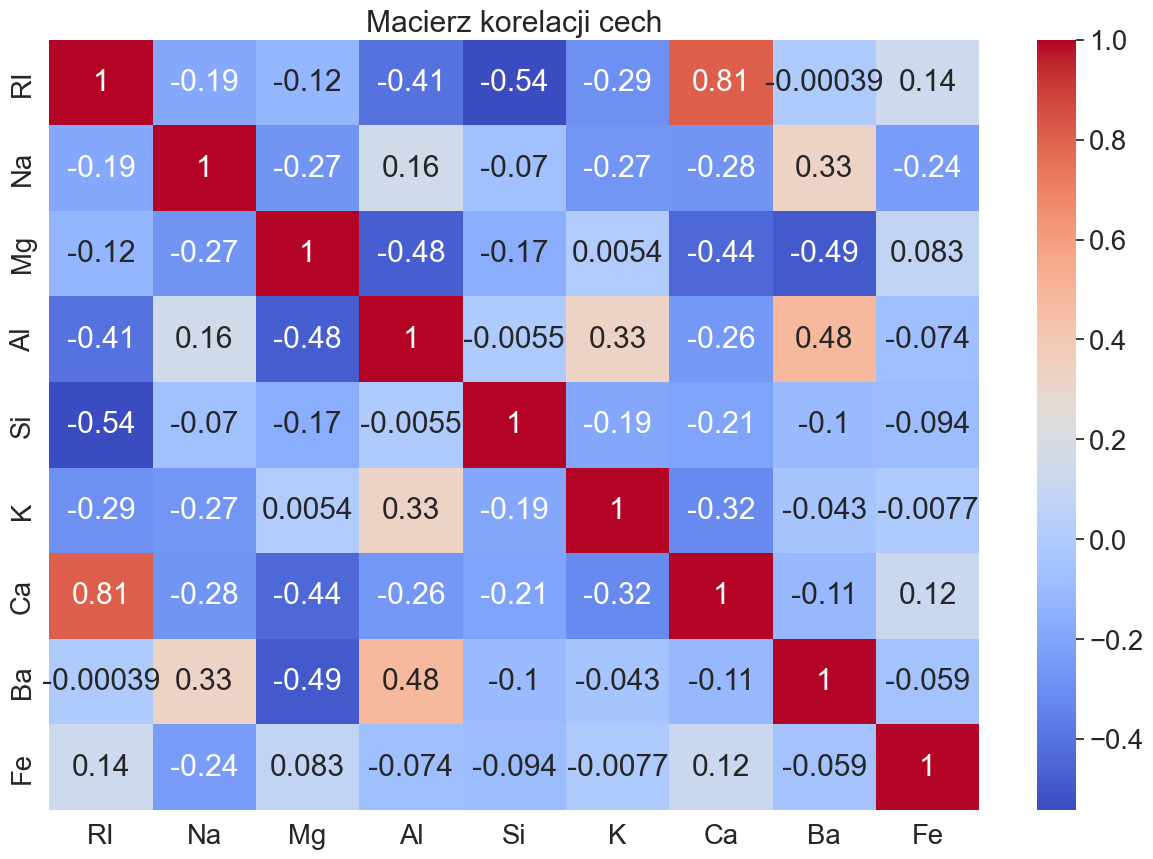

In [174]:
correlation_matrix = X.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji cech')
plt.show()

Nasz wykres pokazuje korelację między różnymi cechami Wnioski:

RI i Ca mają silną korelację między sobą
AI i ba mają pośrednią korelację między sobą

Najpierw zastosujemy model bez przetwarzania danych

C:\Users\filip\AppData\Local\Temp\ipykernel_18240\2830197978.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


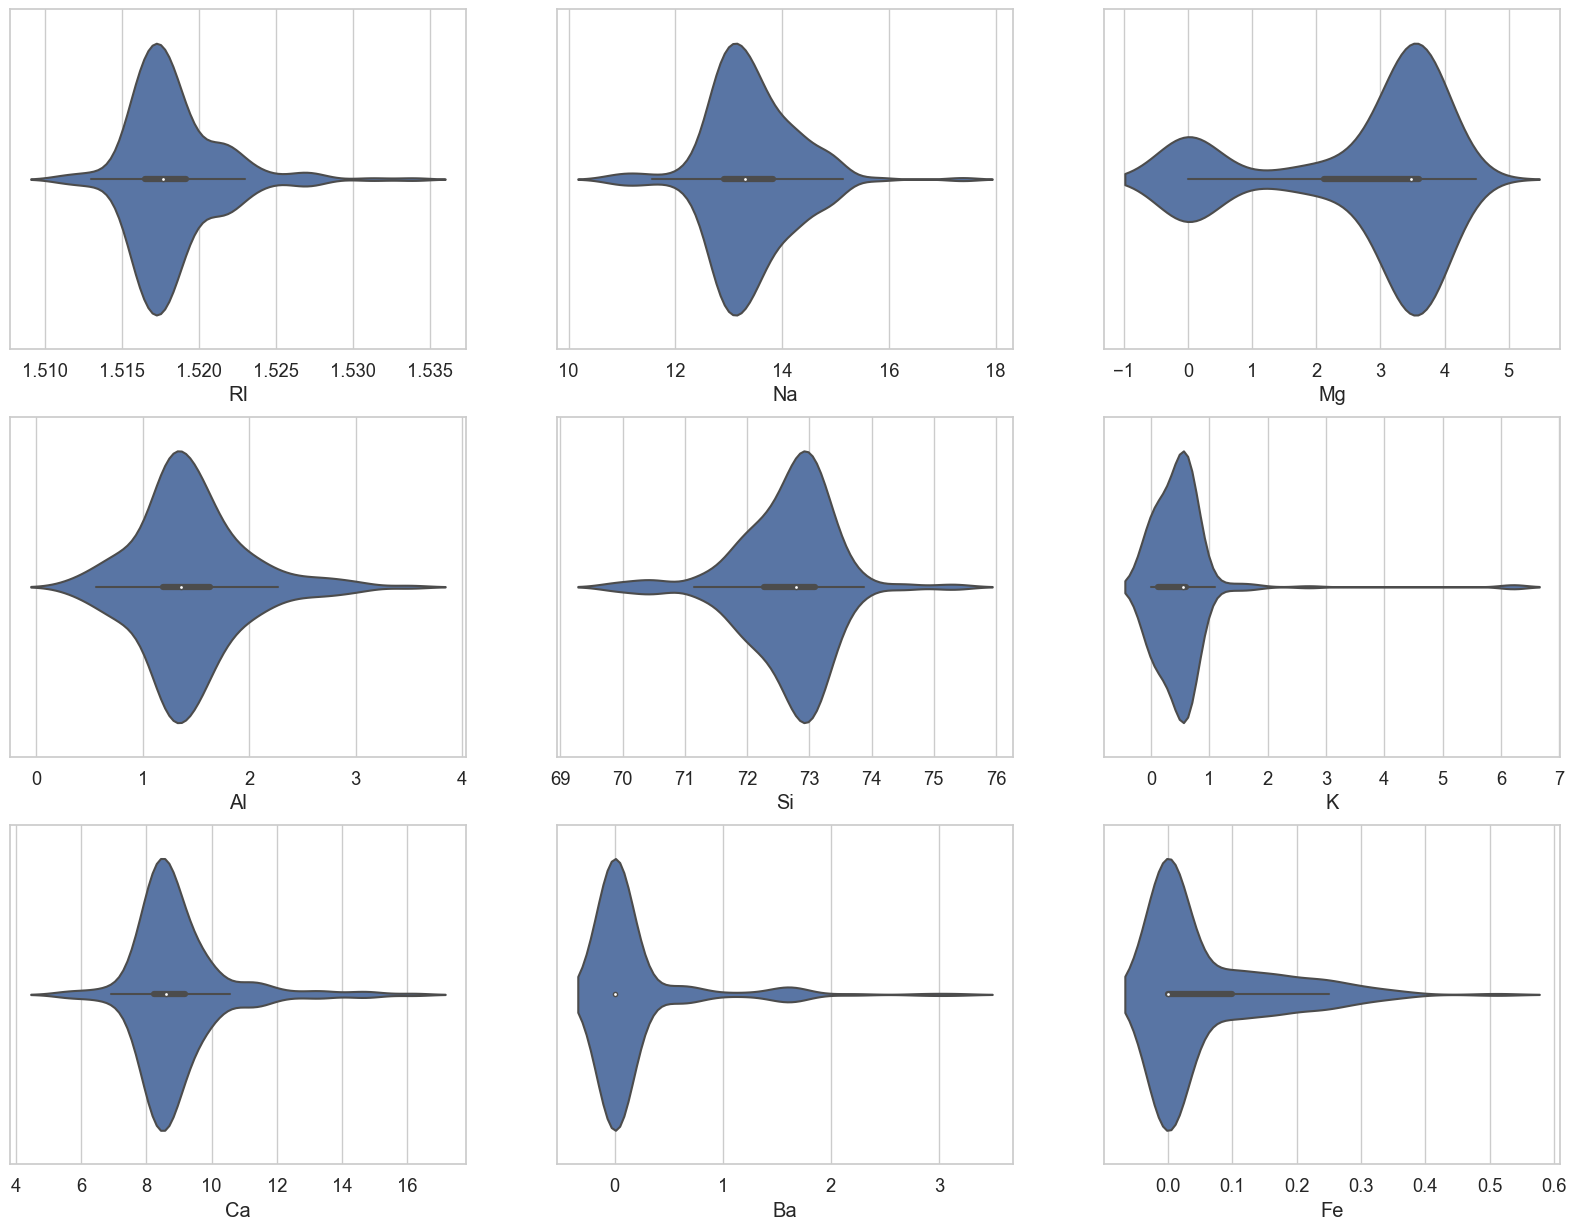

In [175]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
for i, col in enumerate(X.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=col, data=X)



C:\Users\filip\AppData\Local\Temp\ipykernel_18240\811299231.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


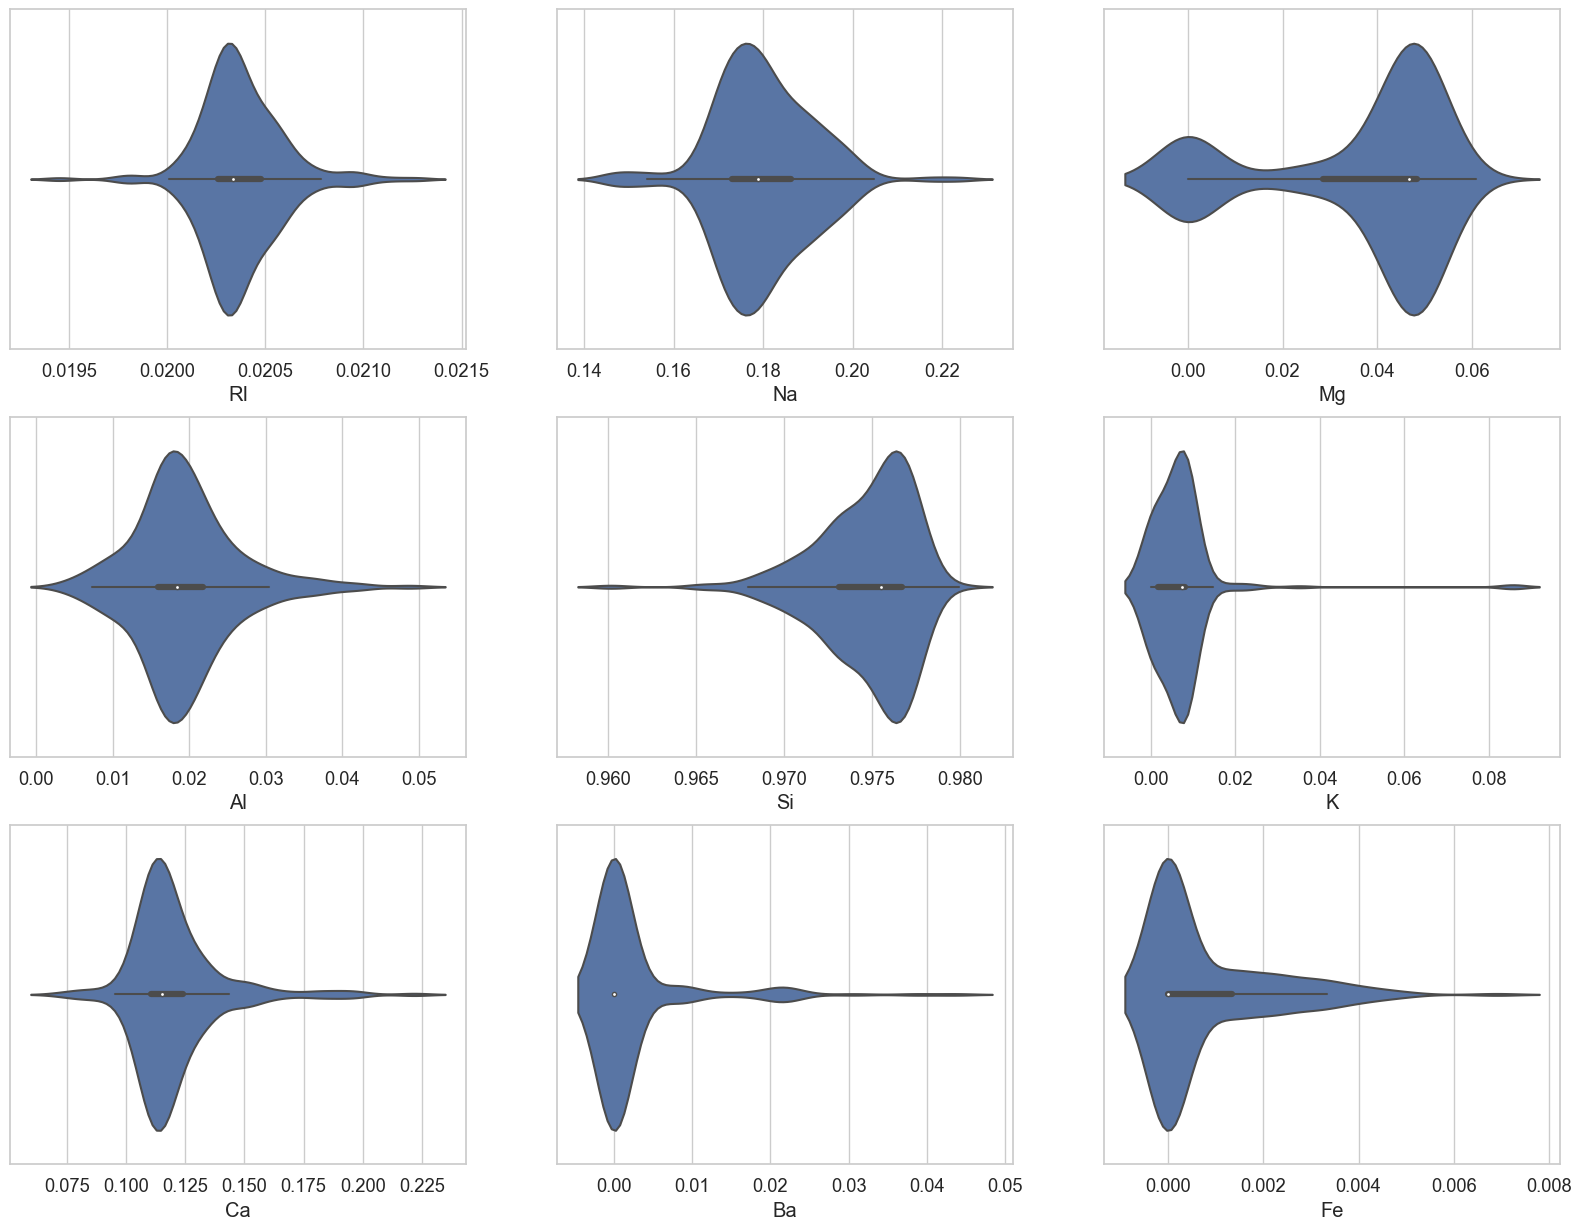

In [176]:
normalized_X = Normalizer().fit_transform(X)
normalized_X_DF = pd.DataFrame(normalized_X, columns=X.columns)

sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
for i, col in enumerate(normalized_X_DF.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=col, data=normalized_X_DF)

C:\Users\filip\AppData\Local\Temp\ipykernel_18240\1833783333.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


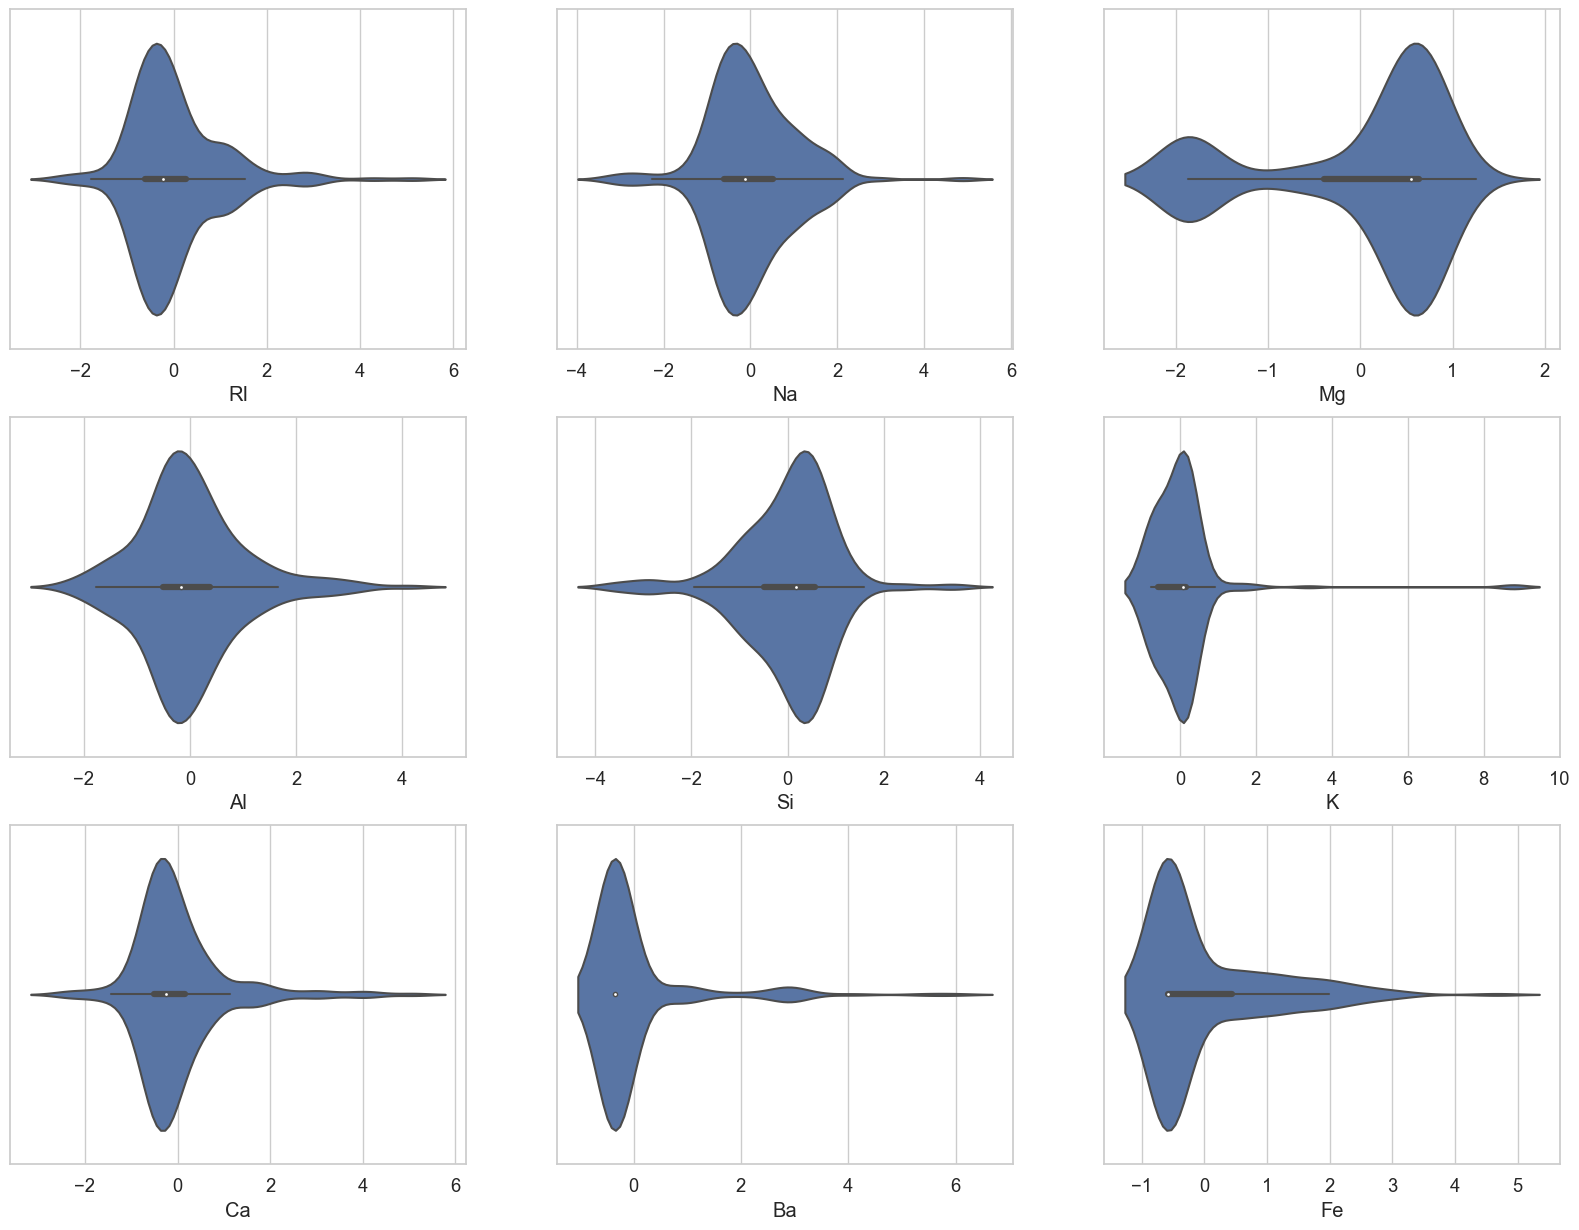

In [177]:
standarized_X = StandardScaler().fit_transform(X)
standarized_X_DF = pd.DataFrame(standarized_X, columns=X.columns)

sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
for i, col in enumerate(standarized_X_DF.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=col, data=standarized_X_DF)


C:\Users\filip\AppData\Local\Temp\ipykernel_18240\3814503394.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


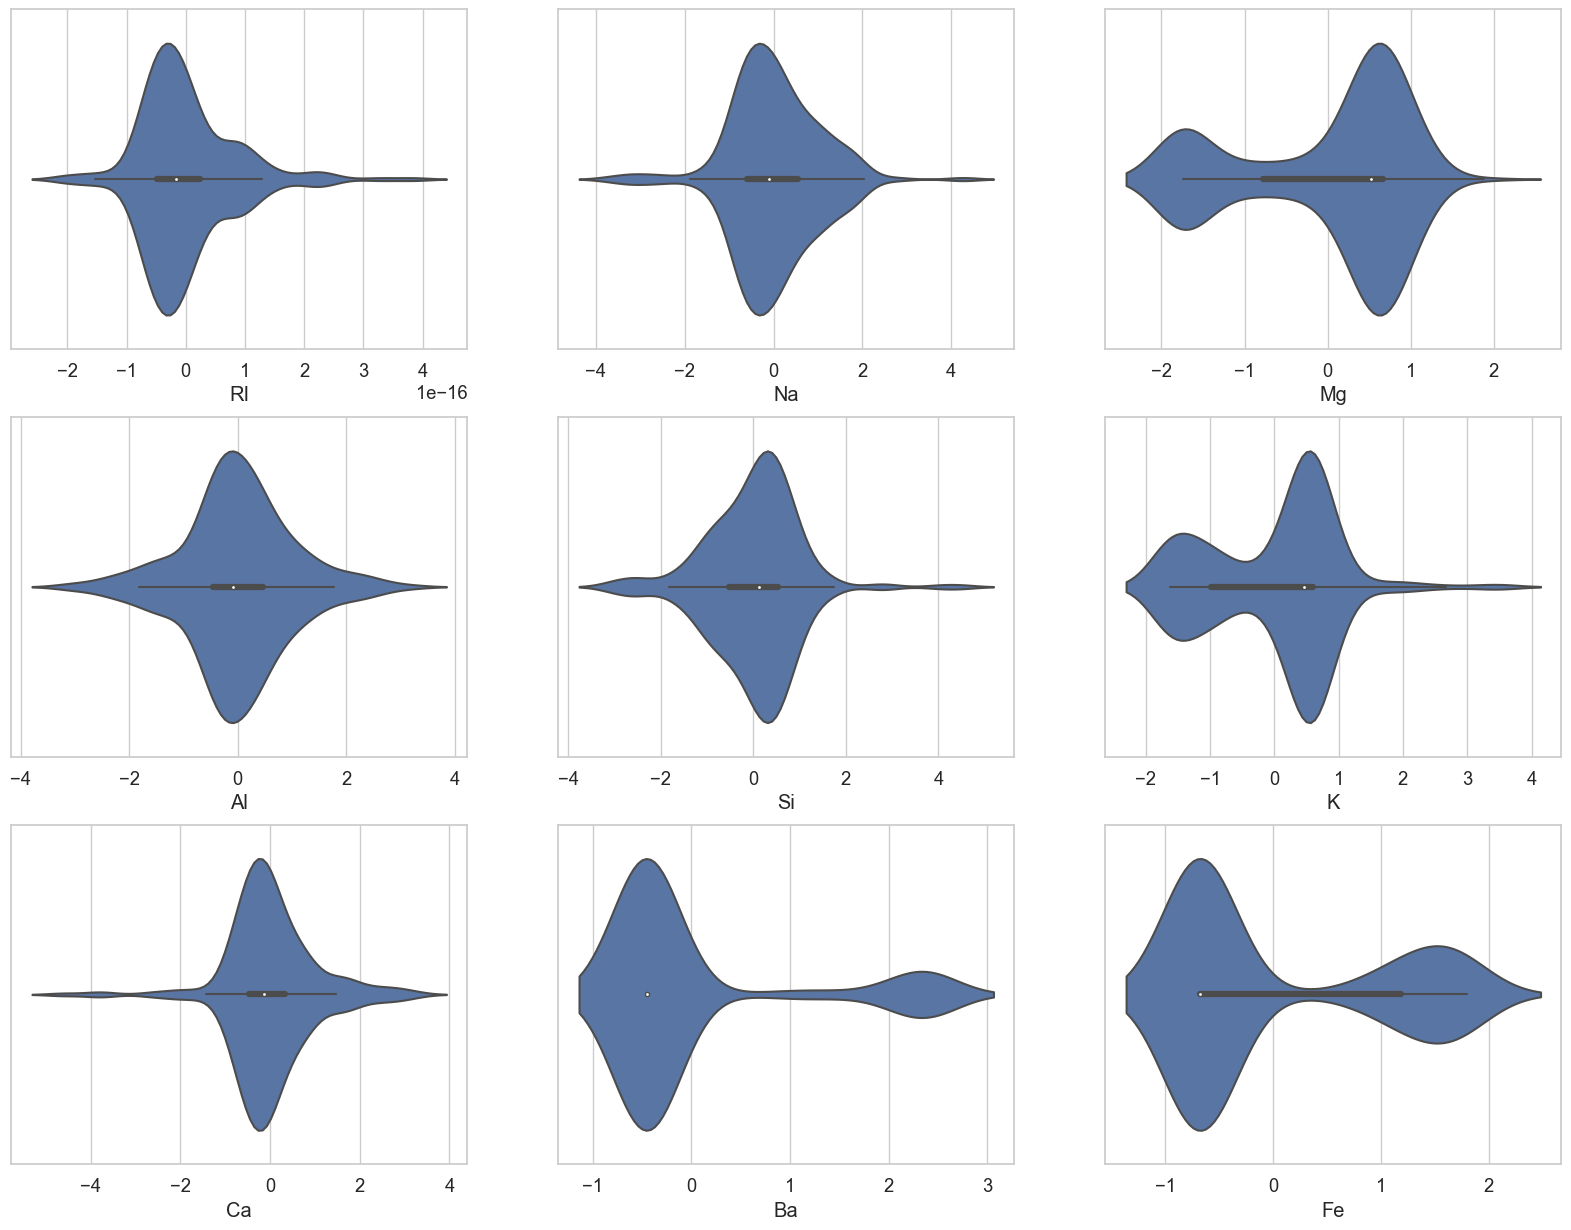

In [178]:
from sklearn.preprocessing import PowerTransformer

transformed_X = PowerTransformer(method='yeo-johnson').fit_transform(X)
transformed_X_DF = pd.DataFrame(transformed_X, columns=X.columns)

sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
for i, col in enumerate(transformed_X_DF.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(x=col, data=transformed_X_DF)

In [179]:

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_DF.head()

PC1       PC2
0 -1.431425 -1.102115
1 -1.436707  0.343585
2 -1.427322  0.345720
3 -1.257825 -0.249060
4 -1.312466 -0.018405

Text(0.5, 1.0, 'PCA')

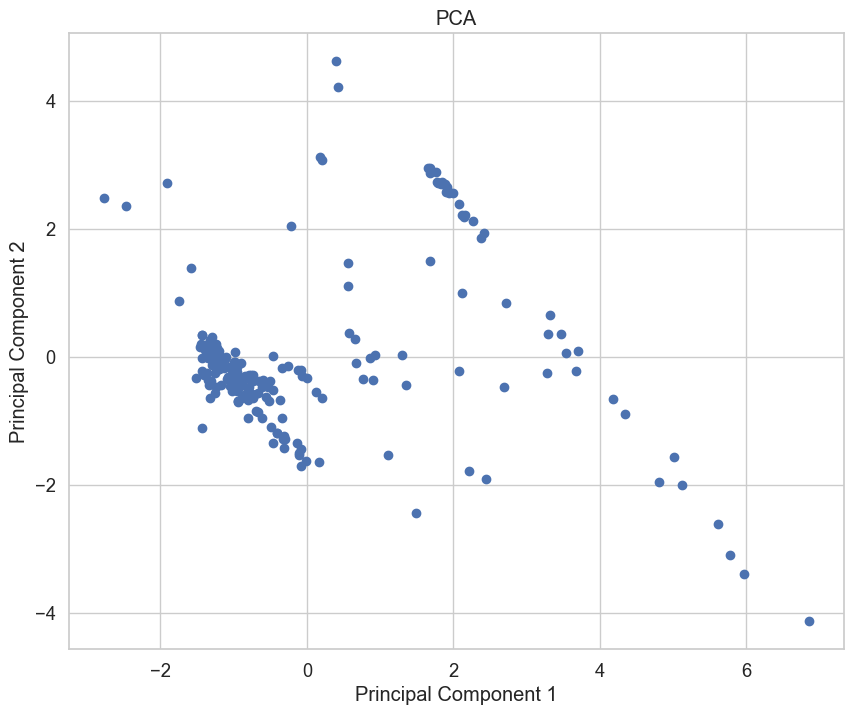

In [180]:
plt.figure(figsize=(10, 8))
plt.scatter(principal_DF['PC1'], principal_DF['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')

zbadaj wpływ różnego typu przetworzenia danych na wyniki klasyfikacji (proponowane: normalizacja, standaryzacja, dyskretyzacja, selekcja cech, PCA) - czyli wykonaj porównanie wyników bez przetworzenia danych z rezultatami po ich przetworzeniu, wykorzystując
co najmniej 2 metody różnego typu (osobno). (30 punktów)

In [181]:
# split data into train and vaildation sets for each of X and y sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(normalized_X, y, test_size=0.3, random_state=0, stratify=y)

X_train_stand, X_val_stand, y_train_stand, y_val_stand = train_test_split(standarized_X, y, test_size=0.3, random_state=0, stratify=y)

X_train_transformed , X_val_transformed, y_train_transformed, y_val_transformed = train_test_split(transformed_X, y, test_size=0.3, random_state=0, stratify=y)

X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(principal_DF, y, test_size=0.3, random_state=0, stratify=y)


In [182]:
# Flattening the array
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

y_train_norm = y_train_norm.values.ravel()
y_val_norm = y_val_norm.values.ravel()

y_train_stand = y_train_stand.values.ravel()
y_val_stand = y_val_stand.values.ravel()

y_train_pca = y_train_pca.values.ravel()
y_val_pca = y_val_pca.values.ravel()

y_train_transformed = y_train_transformed.values.ravel()
y_val_transformed = y_val_transformed.values.ravel()

In [184]:

def train_and_test_model(X_train, X_val, y_train, y_val, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    # show confusion matrix
    # cm = confusion_matrix(y_val, y_pred)
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(cm, annot=True, fmt='g')
    # plt.ylabel('Predicted')
    # plt.xlabel('Actual')
    # plt.show()
    
    return accuracy, precision, recall, f1


In [189]:

accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, GaussianNB())

accuracy_norm, precision_norm, recall_norm, f1_norm = train_and_test_model(X_train_norm, X_val_norm, y_train_norm, y_val_norm, GaussianNB())

accuracy_stand, precision_stand, recall_stand, f1_stand = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, GaussianNB())

accuracy_pca, precision_pca, recall_pca, f1_pca = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, GaussianNB())

accuracy_transformed, precision_transformed, recall_transformed, f1_transformed = train_and_test_model(X_train_transformed, X_val_transformed, y_train_transformed, y_val_transformed, GaussianNB())

# compare results of each data processing method in a table
results_nb = pd.DataFrame({'Accuracy': [accuracy, accuracy_norm, accuracy_stand, accuracy_pca, accuracy_transformed],
                        'Precision': [precision, precision_norm, precision_stand, precision_pca, precision_transformed],
                        'Recall': [recall, recall_norm, recall_stand, recall_pca, recall_transformed],
                        'F1': [f1, f1_norm, f1_stand, f1_pca, f1_transformed]},
                        index=['Not processed', 'Normalized', 'Standarized', 'PCA', 'Transformed'])
results_nb


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy  Precision    Recall        F1
Not processed  0.492308   0.432652  0.492308  0.418980
Normalized     0.430769   0.371331  0.430769  0.380155
Standarized    0.492308   0.432652  0.492308  0.418980
PCA            0.430769   0.389793  0.430769  0.384625
Transformed    0.446154   0.440461  0.446154  0.427264

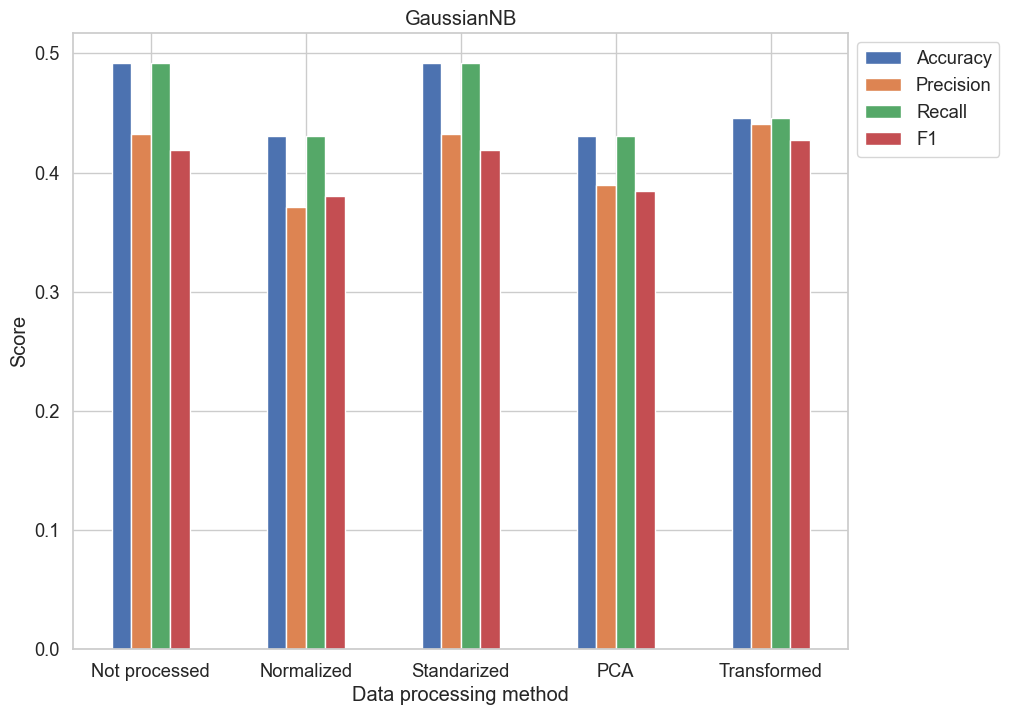

In [186]:

# visualise it in a bar chart
results_nb.plot(kind='bar', figsize=(10, 8))
plt.title('GaussianNB')
plt.xlabel('Data processing method')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))



In [188]:
from sklearn.tree import DecisionTreeClassifier
accuracy, precision, recall, f1 = train_and_test_model(X_train, X_val, y_train, y_val, DecisionTreeClassifier(random_state=0))

accuracy_norm, precision_norm, recall_norm, f1_norm = train_and_test_model(X_train_norm, X_val_norm, y_train_norm, y_val_norm, DecisionTreeClassifier(random_state=0))

accuracy_stand, precision_stand, recall_stand, f1_stand = train_and_test_model(X_train_stand, X_val_stand, y_train_stand, y_val_stand, DecisionTreeClassifier(random_state=0))

accuracy_pca, precision_pca, recall_pca, f1_pca = train_and_test_model(X_train_pca, X_val_pca, y_train_pca, y_val_pca, DecisionTreeClassifier(random_state=0))

accuracy_transformed, precision_transformed, recall_transformed, f1_transformed = train_and_test_model(X_train_transformed, X_val_transformed, y_train_transformed, y_val_transformed, DecisionTreeClassifier(random_state=0))

# compare results of each data processing method in a table
results_dt = pd.DataFrame({'Accuracy': [accuracy, accuracy_norm, accuracy_stand, accuracy_pca, accuracy_transformed],
                        'Precision': [precision, precision_norm, precision_stand, precision_pca, precision_transformed],
                        'Recall': [recall, recall_norm, recall_stand, recall_pca, recall_transformed],
                        'F1': [f1, f1_norm, f1_stand, f1_pca, f1_transformed]},
                        index=['Not processed', 'Normalized', 'Standarized', 'PCA', 'Transformed'])
results_dt


Accuracy  Precision    Recall        F1
Not processed  0.615385   0.698445  0.615385  0.635385
Normalized     0.600000   0.668159  0.600000  0.624908
Standarized    0.615385   0.698445  0.615385  0.635385
PCA            0.630769   0.659302  0.630769  0.643370
Transformed    0.661538   0.708563  0.661538  0.659405

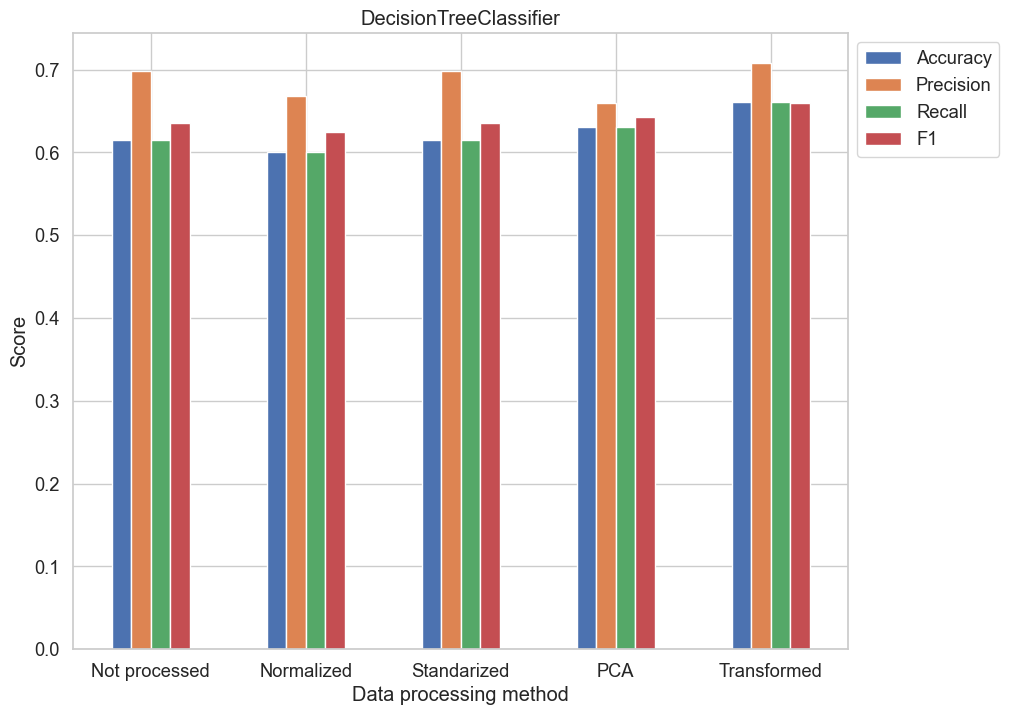

In [190]:

# visualise it in a bar chart
results_dt.plot(kind='bar', figsize=(10, 8))
plt.title('DecisionTreeClassifier')
plt.xlabel('Data processing method')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))


klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)
Bonus – Przetestuj (ze zrozumieniem!) bardziej zaawansowane algorytmy, takie jak Las losowy
czy Klasyfikator wektorów nośnych (SVM, z ang. Support Vector Machines). (5 punktów)

klasyfikacja – przetestuj klasyfikatory i zbadaj wpływ na wyniki: naiwny klasyfikator Bayesa oraz
drzewo decyzjne używając przynajmniej 3 różnych zestawów hiperparametrów. (40 punktów)



In [191]:
def processing():
    return [('None', X_train, X_val, y_train, y_val),
        ('Normalizer', X_train_norm, X_val_norm, y_train_norm, y_val_norm),
        ('StandardScaler', X_train_stand, X_val_stand, y_train_stand, y_val_stand),
        ('PCA', X_train_pca, X_val_pca, y_train_pca, y_val_pca),
        ('Transformed', X_train_transformed, X_val_transformed, y_train_transformed, y_val_transformed)]

In [192]:

def nb_classifiers_create(params):
    nb_params = params
    nb_classifiers = []
    
    for param in nb_params:
        nb = GaussianNB(var_smoothing=param)
        nb_classifiers.append(nb)

    return nb_classifiers

In [193]:
def iterate_classifiers(classifiers):

    for name, X_processed_train, X_processed_val, y_processed_train, y_processed_val in processing():
        results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'])
        index = 0
        best_iter = 0
        best_accuracy = 0
        for classifier in classifiers:
            accuracy, precision, recall, f1 = train_and_test_model(X_processed_train, X_processed_val, y_processed_train, y_processed_val, classifier)
            results.loc[classifier.__class__.__name__ + str(name) + ' ' +  str(index)] = [accuracy, precision, recall, f1]
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_iter = index
            index += 1
        print('Best iteration: ', best_iter)
        results.plot(kind='line', figsize=(10, 8))
        plt.xlabel('Classifier')
        plt.ylabel('Scores')
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.0, 1.0))


Naive Bayes


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  11


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  10


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  9


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  10
Best iteration:  0


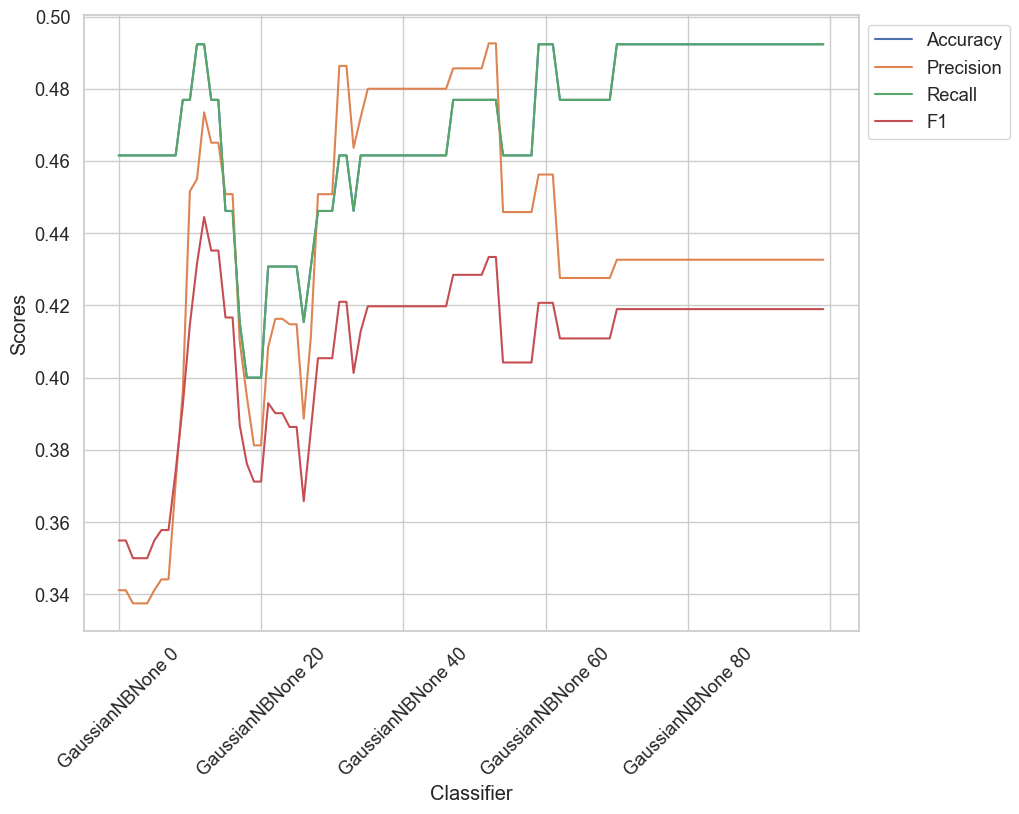

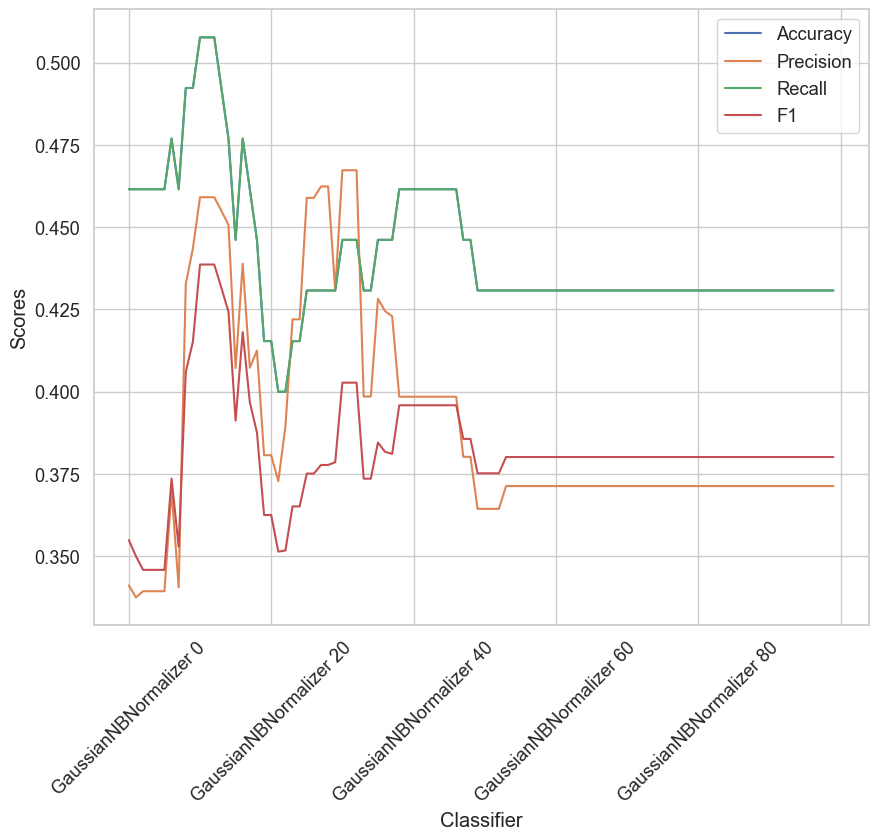

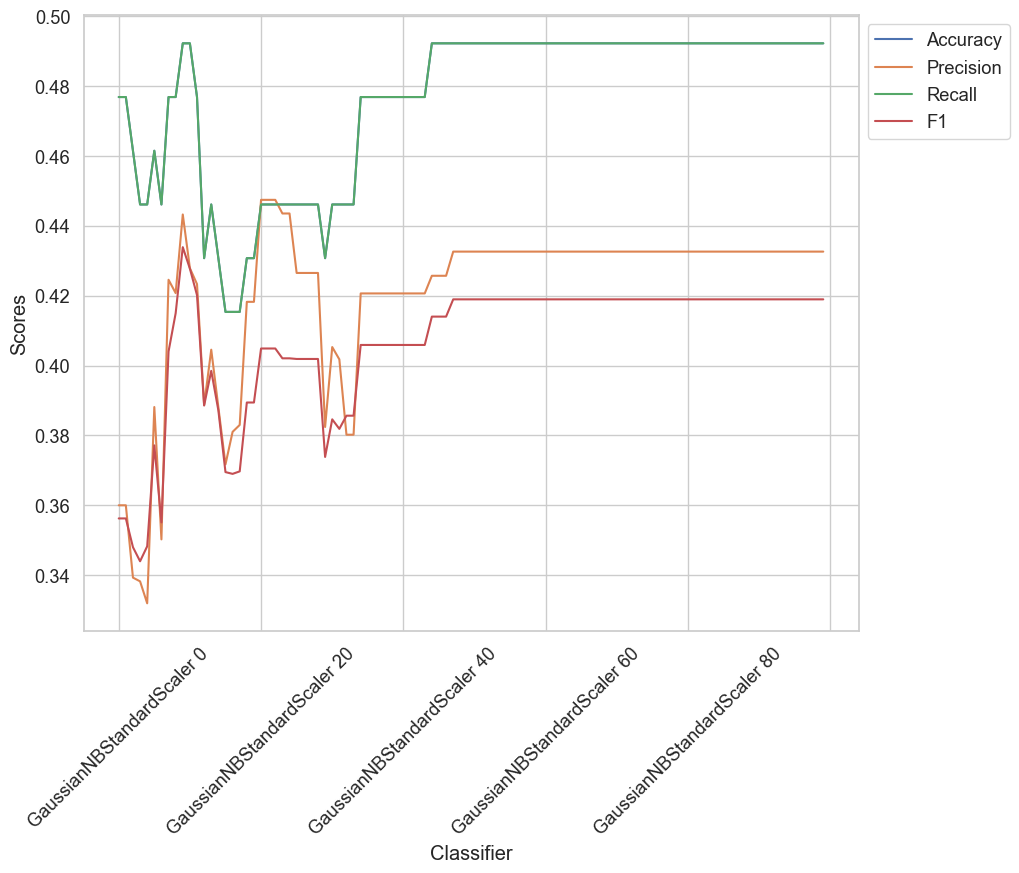

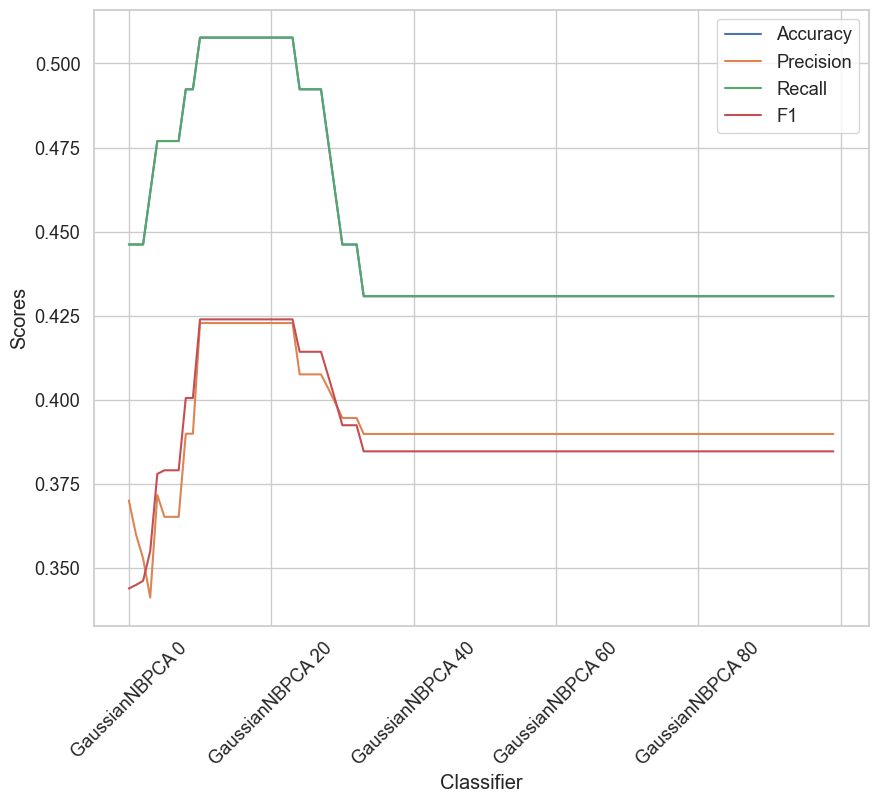

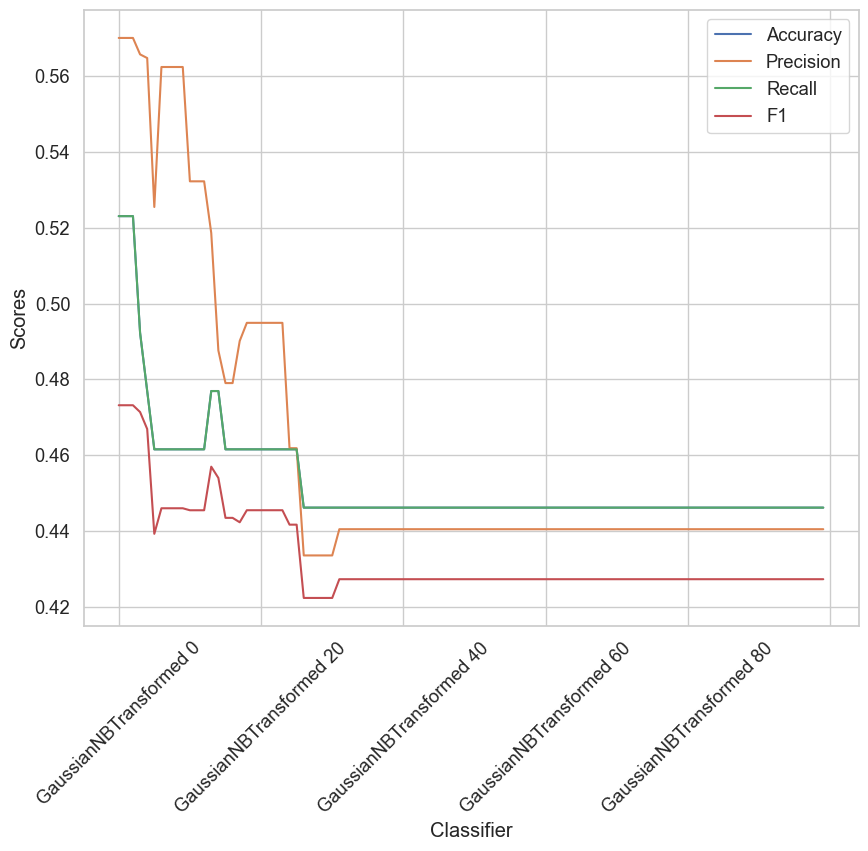

In [194]:
# iterate over NB classifiers
import numpy as np
nb_params = np.logspace(0, -9, num=100)
# get first 30 params
nb_classifiers = nb_classifiers_create(nb_params)
print('Naive Bayes')
iterate_classifiers(nb_classifiers)

In [195]:
def dt_classifiers_create(dt_params):
    dt_classifiers = []
    for params in dt_params:
        dt = DecisionTreeClassifier(criterion=params.get('criterion'), max_depth=params.get('max_depth'),
                                    min_samples_split=params.get('min_samples_split'), random_state=0)
        dt_classifiers.append(dt)

    return dt_classifiers


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  2
Best iteration:  2


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  2
Best iteration:  3


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  2


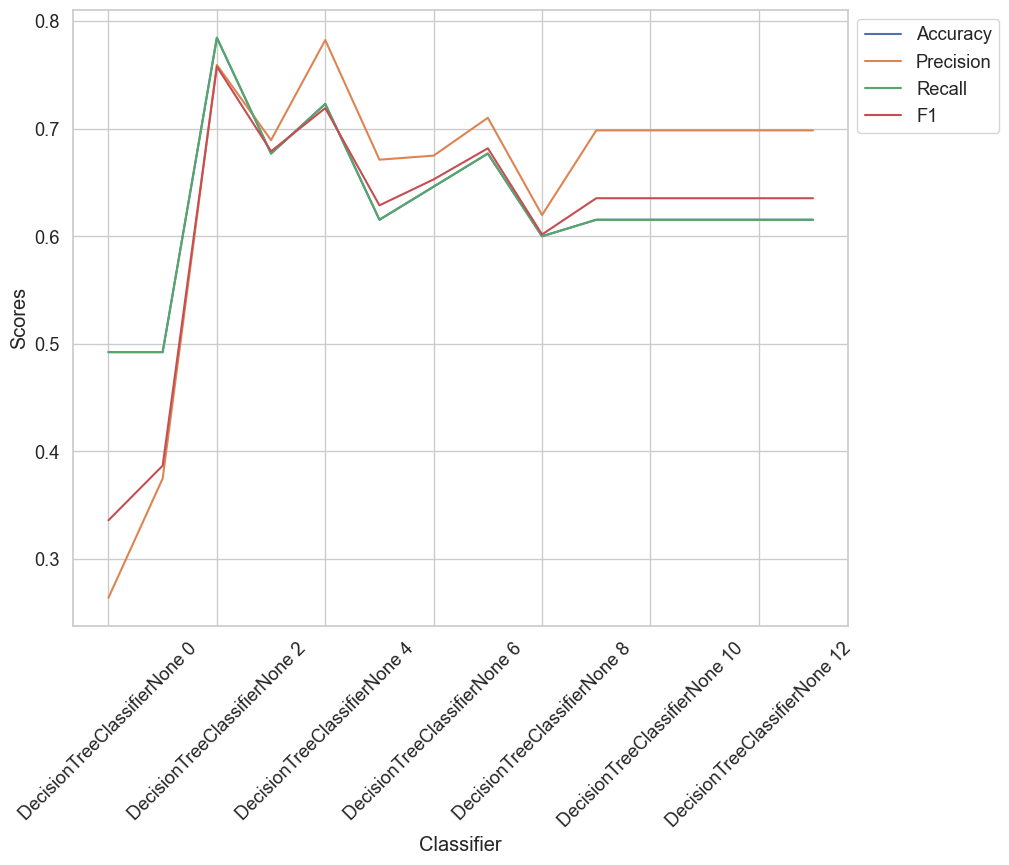

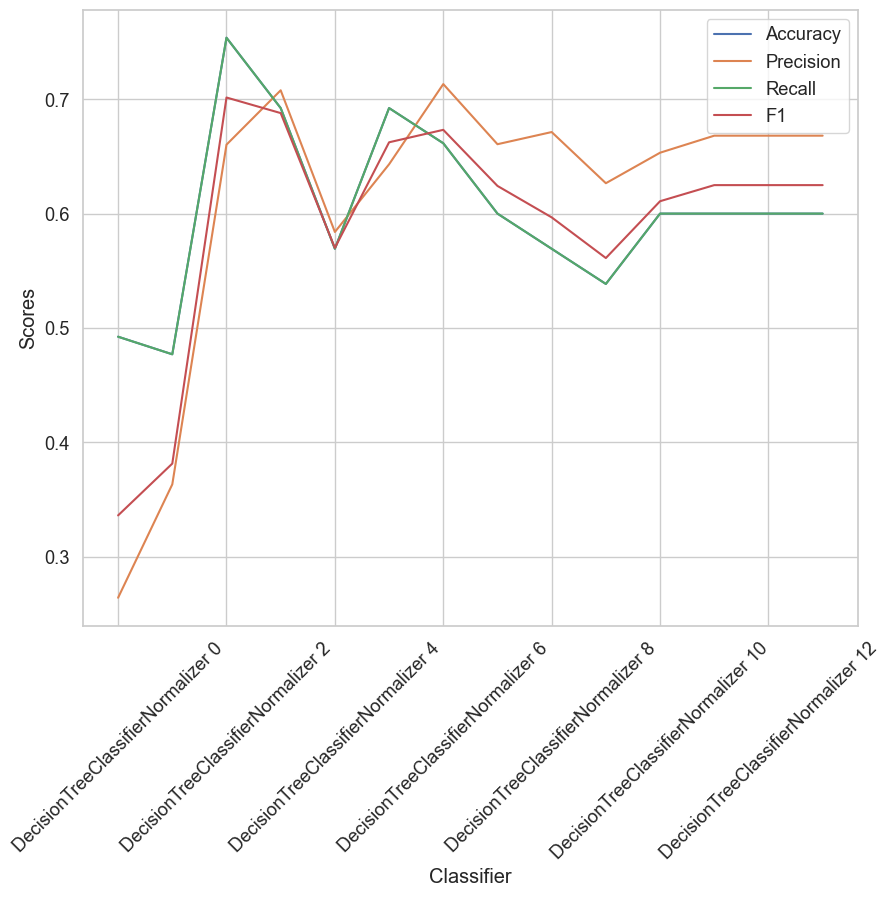

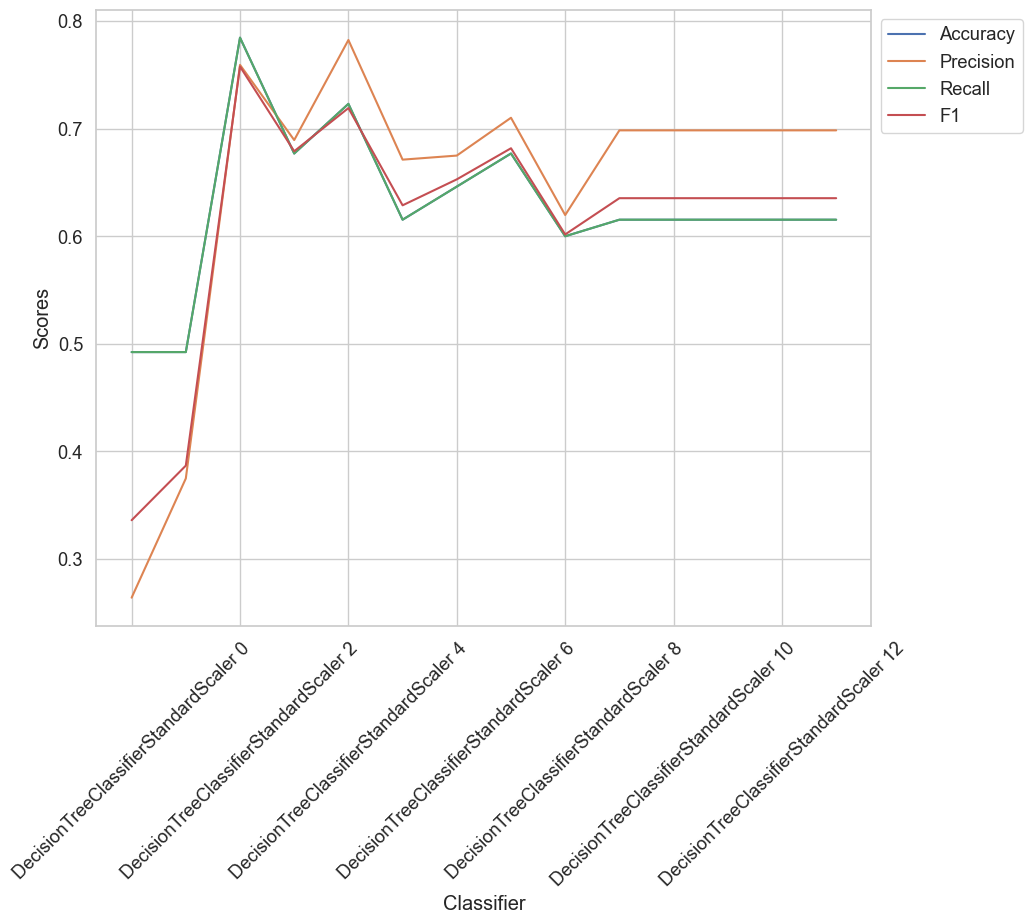

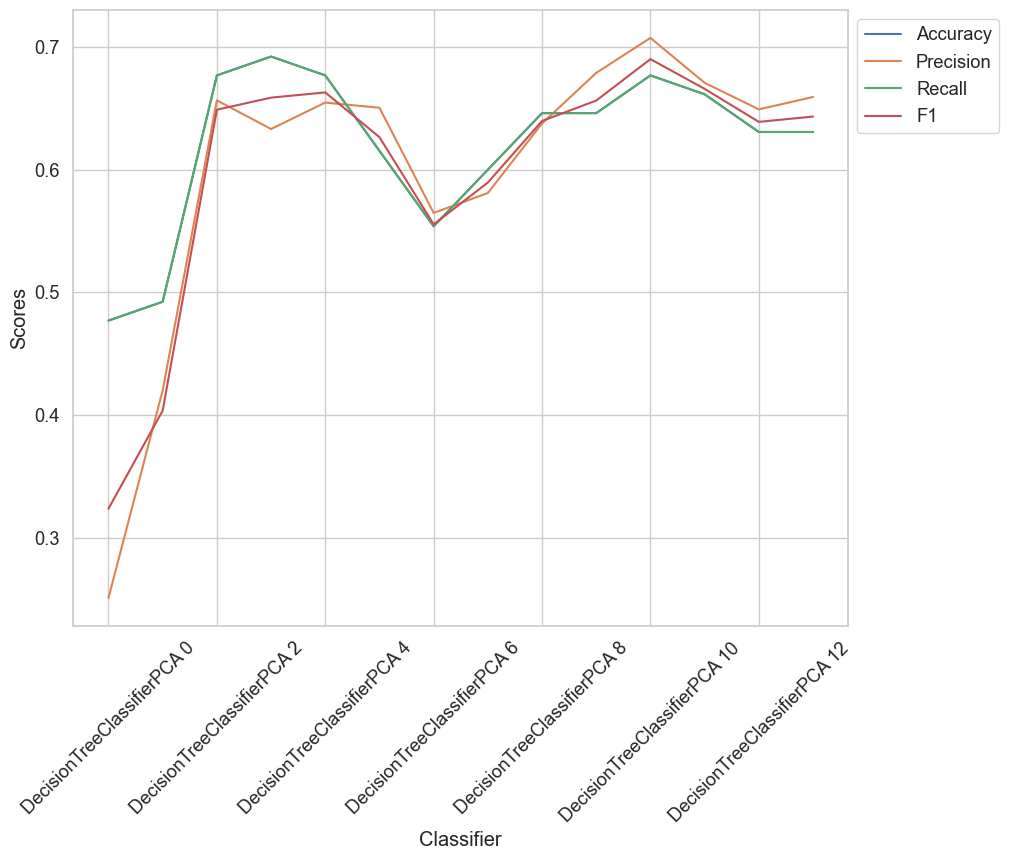

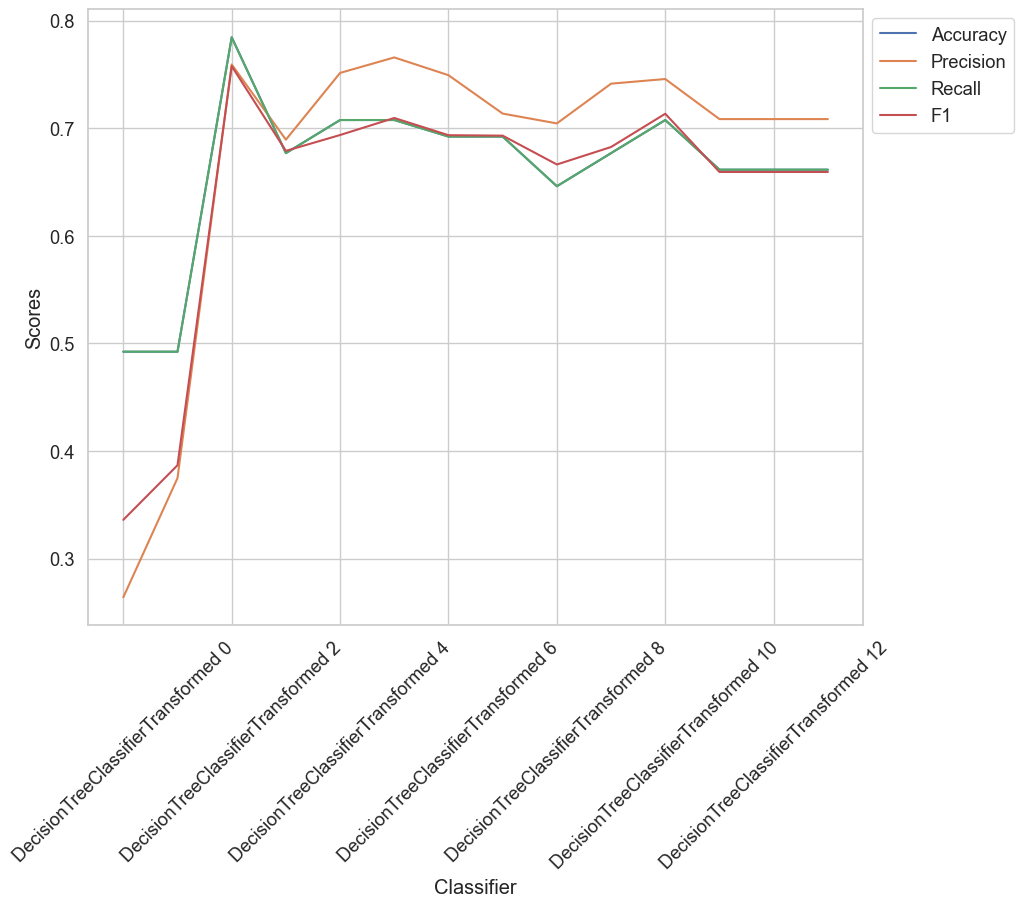

In [196]:
dt_params = []
for i in range(1, 15):
    dt_params.append({'max_depth': i, 'min_samples_split': 2, 'criterion': 'gini'})

dt_classifiers = dt_classifiers_create(dt_params)
iterate_classifiers(dt_classifiers)

C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  4
Best iteration:  0


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  4
Best iteration:  21


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  0


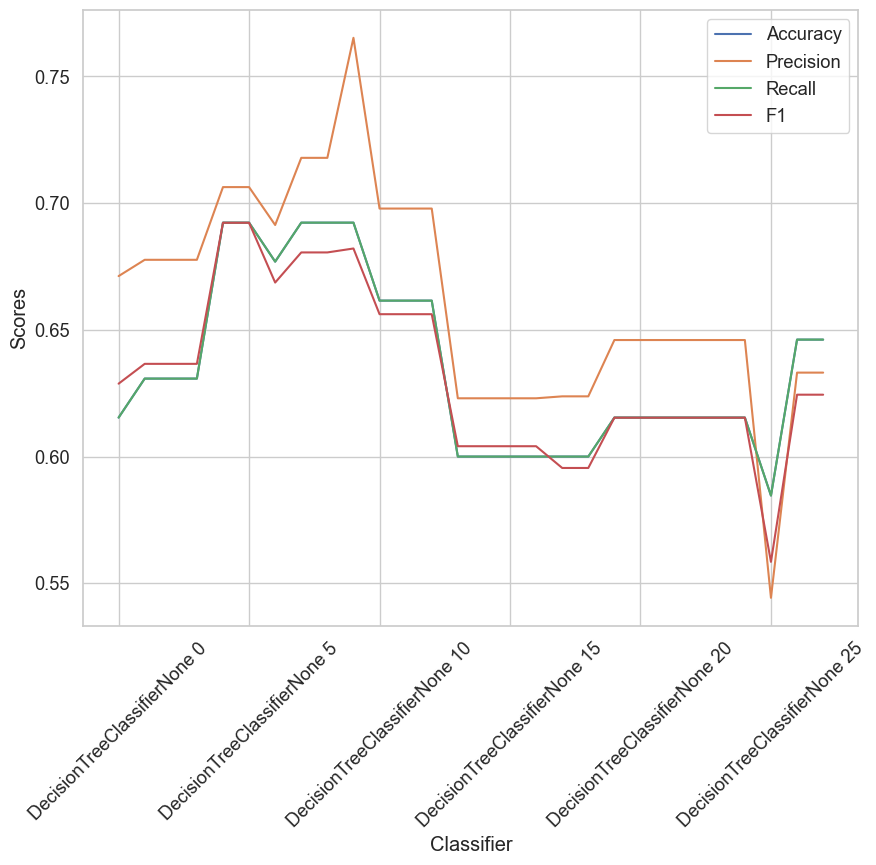

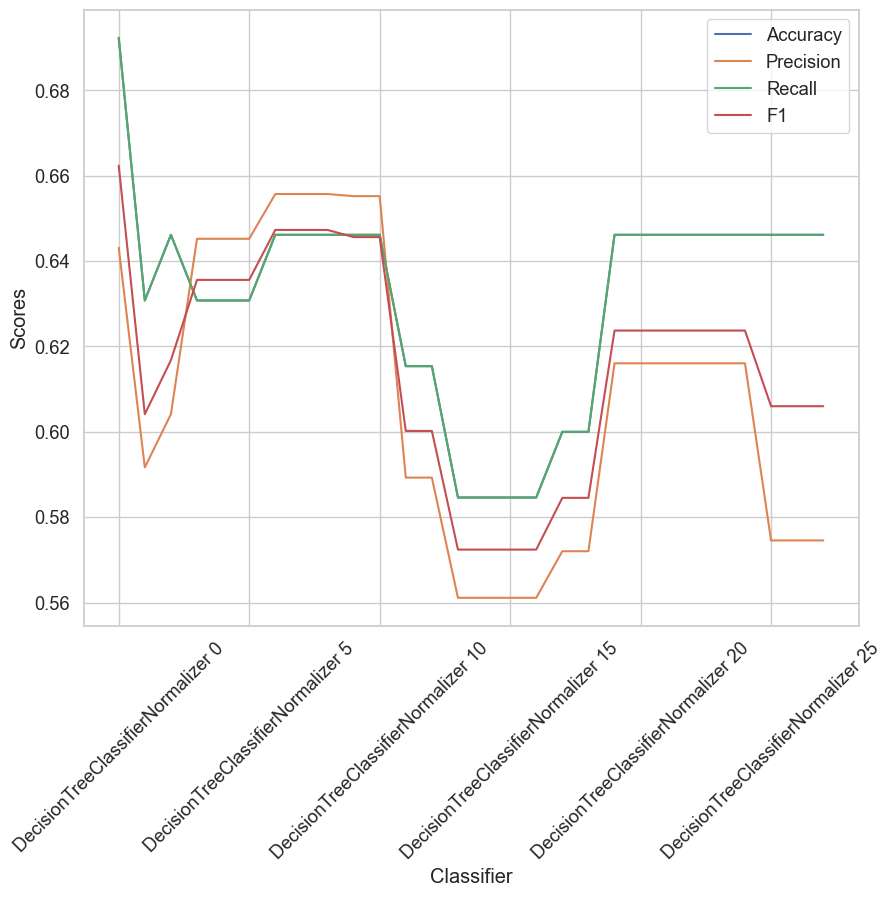

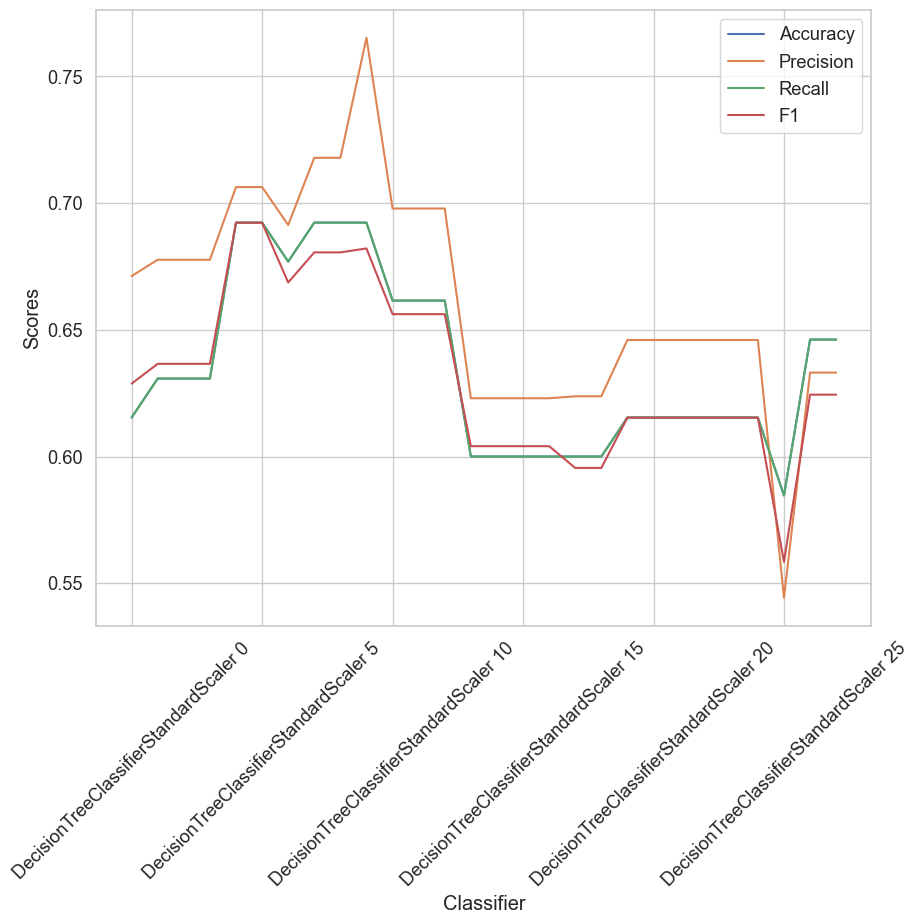

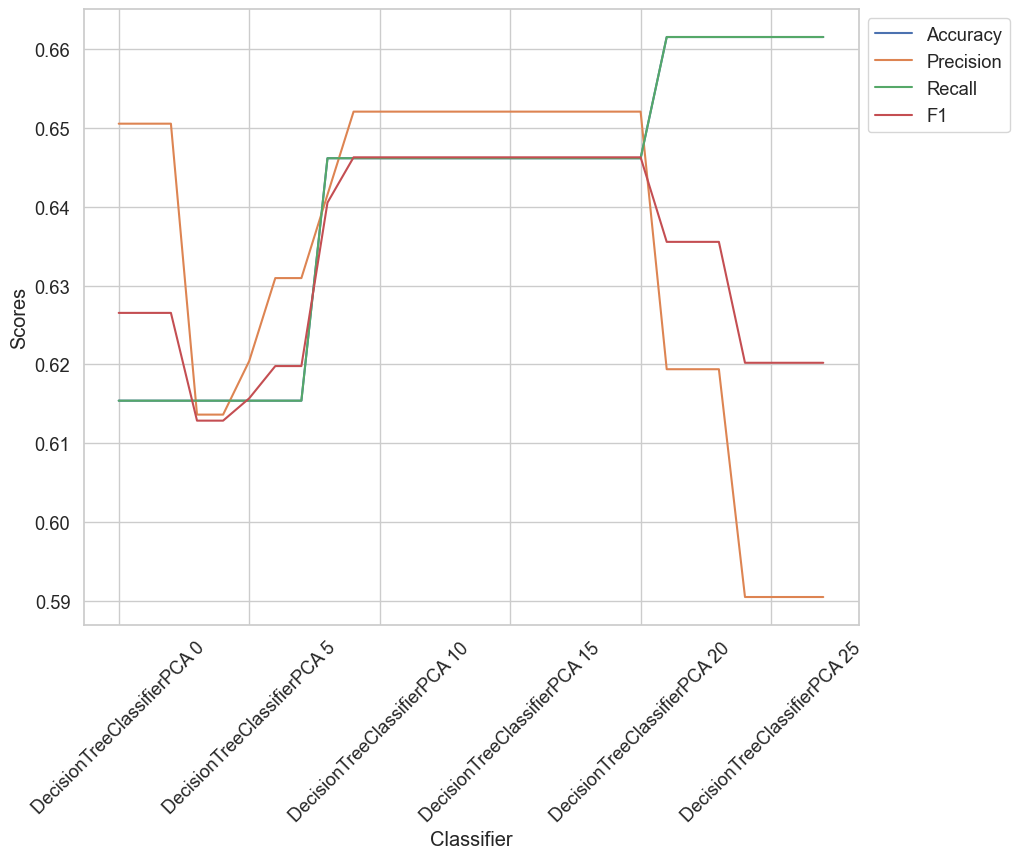

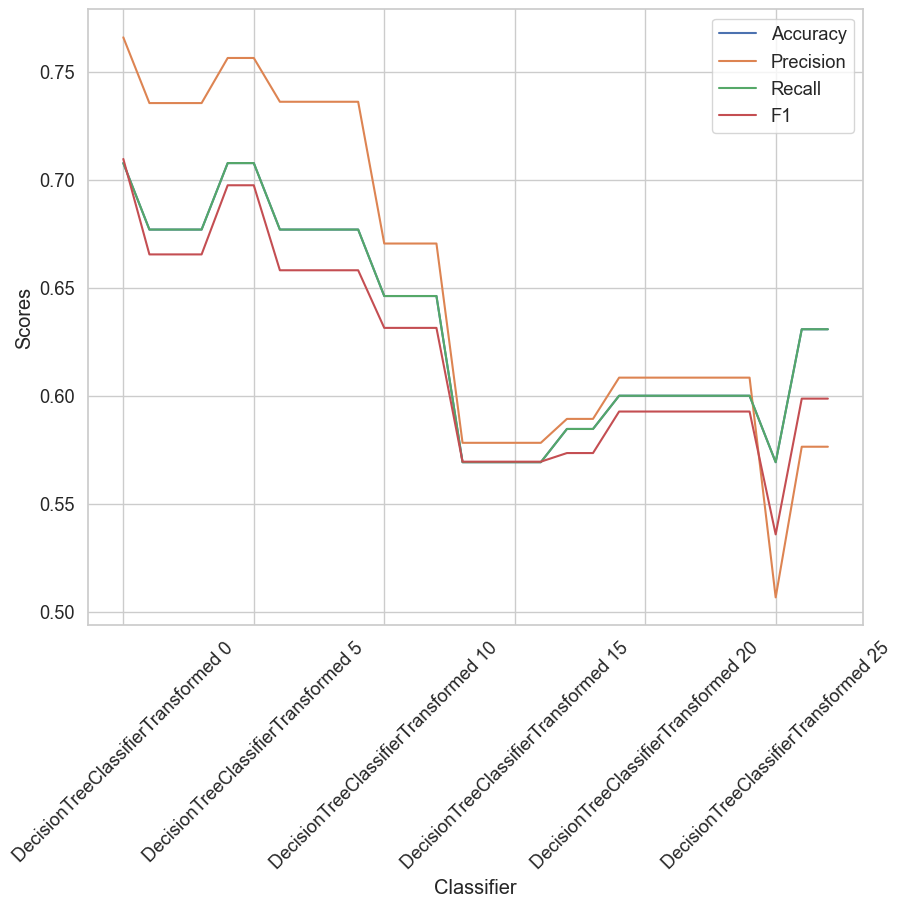

In [197]:
dt_params = []
for i in range(2, 30):
    dt_params.append({'max_depth': 6, 'min_samples_split': i, 'criterion': 'gini'})

dt_classifiers = dt_classifiers_create(dt_params)
iterate_classifiers(dt_classifiers)

ocena klasyfikacji – do porównania wyników różnego typu przygotowania danych oraz wykorzystanego klasyfikatora użyj poznanych metryk oceny klasyfikacji i zinterpretuj wyniki.



C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

Best iteration:  1
Best iteration:  0
Best iteration:  1
Best iteration:  2


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best iteration:  0


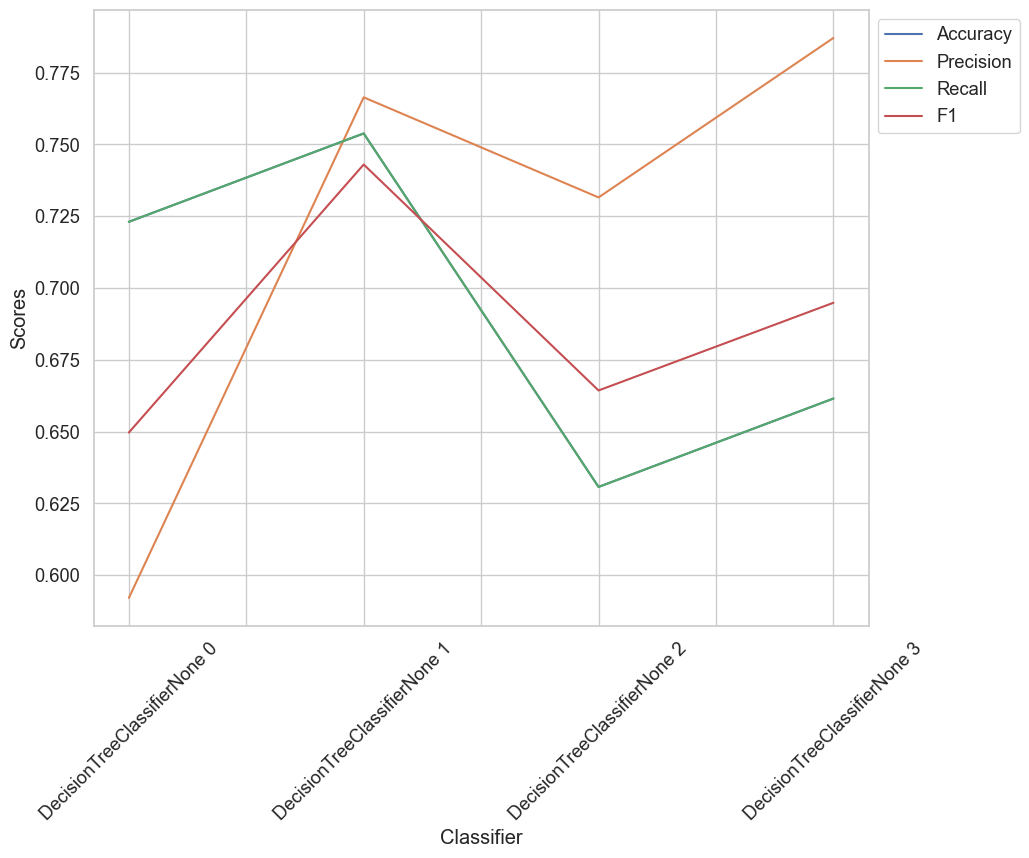

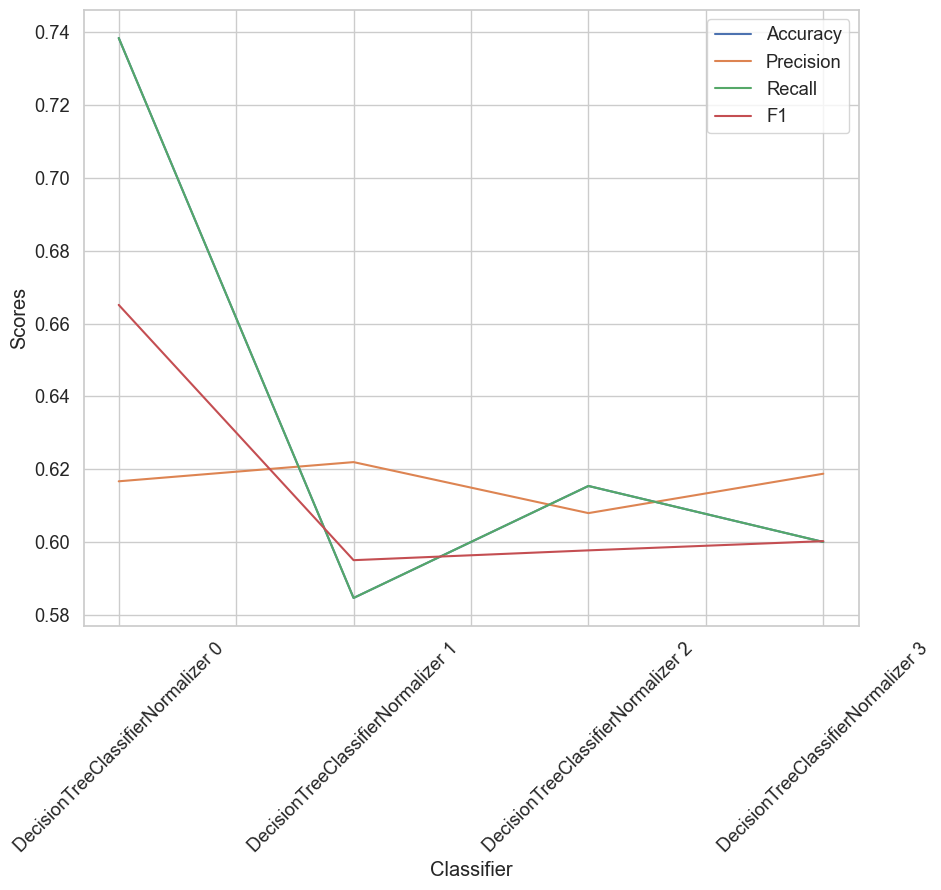

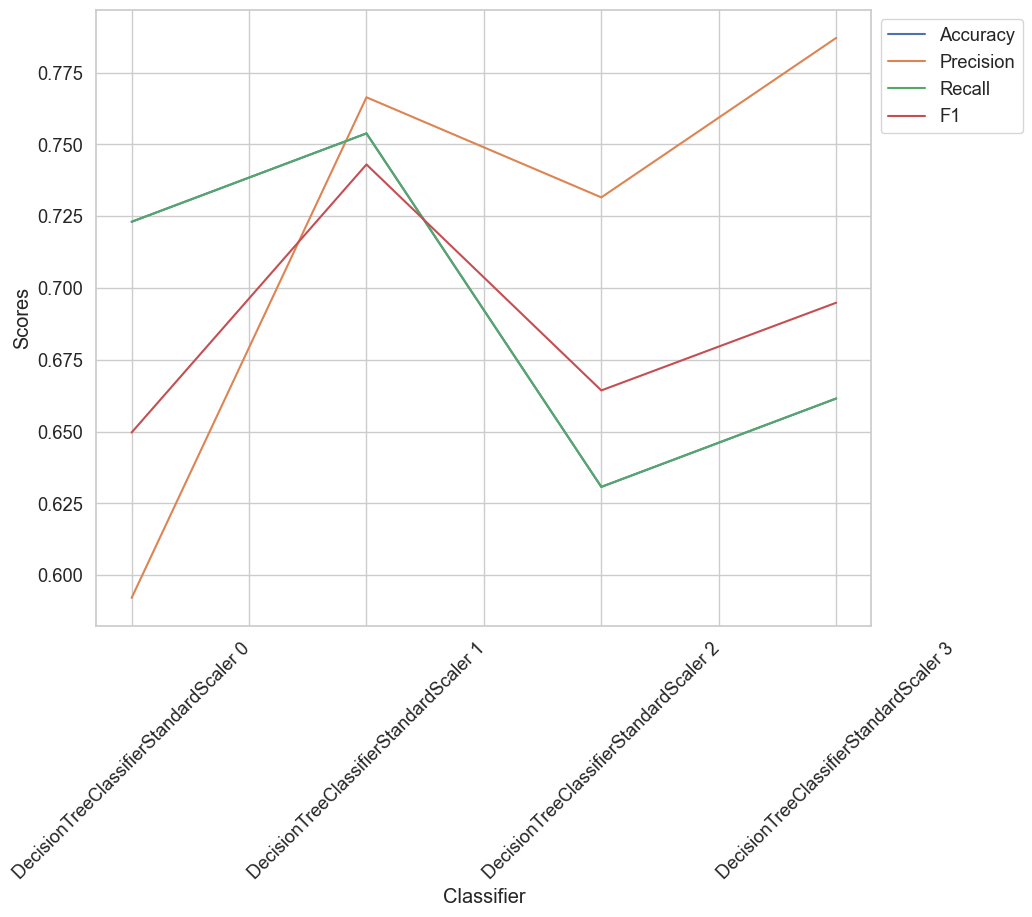

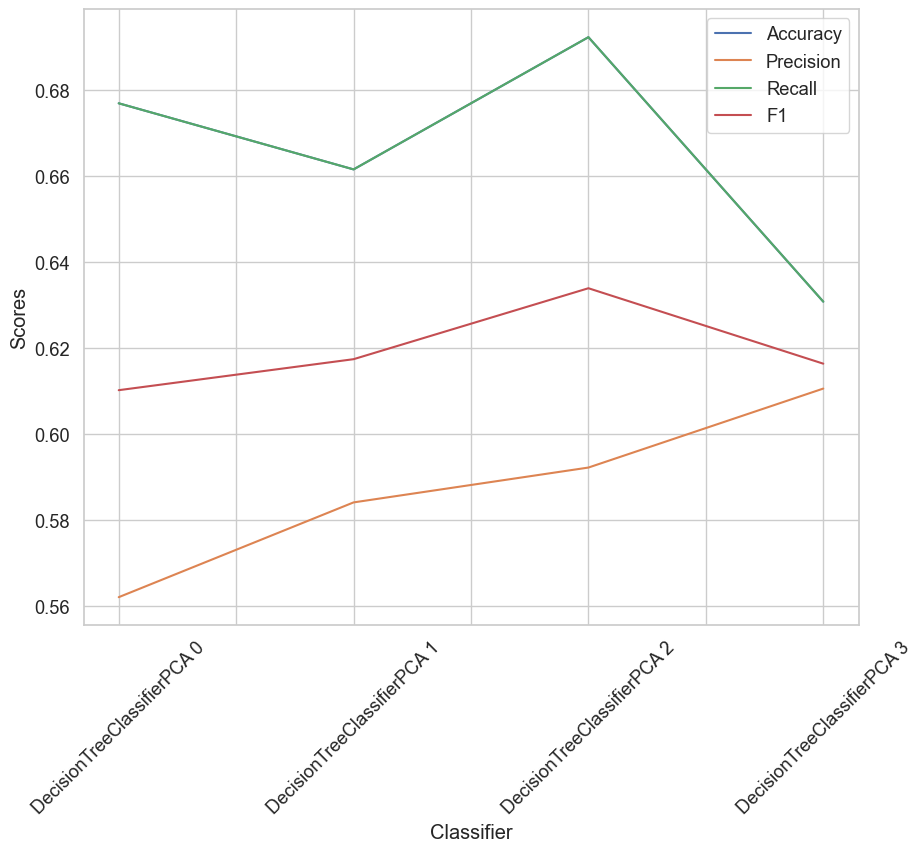

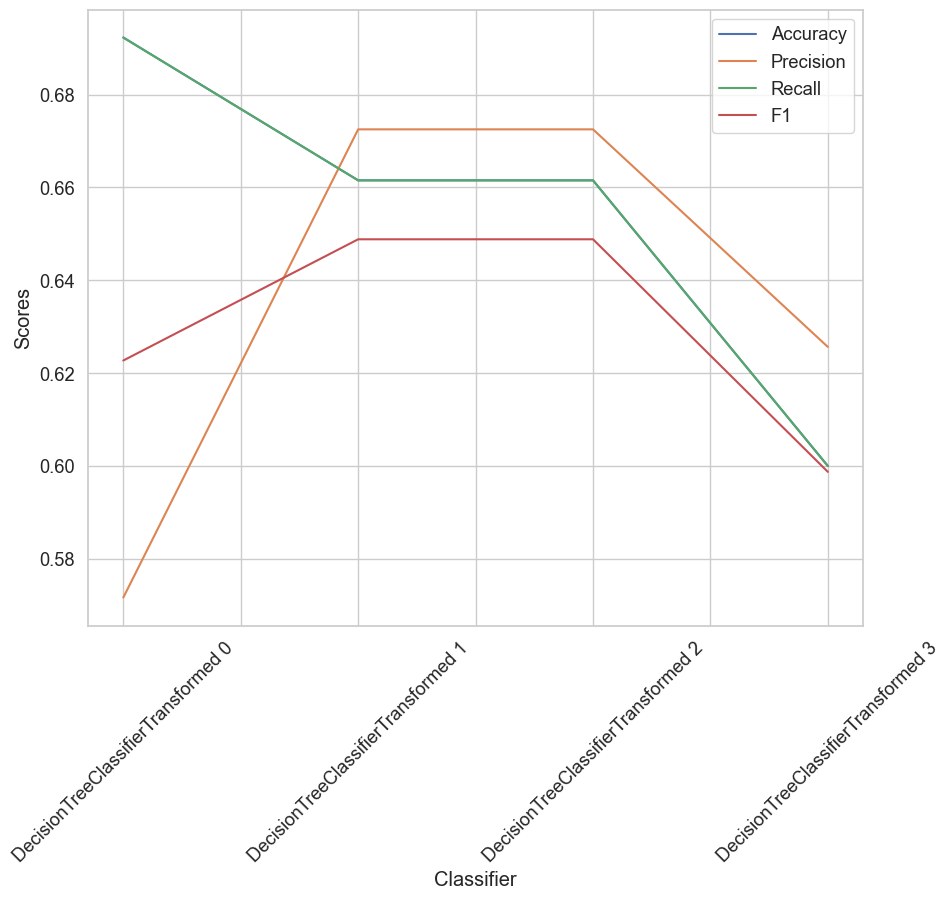

In [200]:
# iterate over DT classifiers
dt_params = [
    {'max_depth': 2, 'min_samples_split': 2, 'criterion': 'entropy'},
    {'max_depth': 4, 'min_samples_split': 2, 'criterion': 'entropy'},
    {'max_depth': 4, 'min_samples_split': 10, 'criterion': 'entropy'},
    {'max_depth': 10, 'min_samples_split': 10, 'criterion': 'entropy'},
]

dt_classifiers = dt_classifiers_create(dt_params)
iterate_classifiers(dt_classifiers)

['None0']
['None1']
['None2']
['Normalizer0']
['Normalizer1']
['Normalizer2']
['StandardScaler0']
['StandardScaler1']
['StandardScaler2']
['PCA0']
['PCA1']
['PCA2']
['Transformed0']
['Transformed1']
['Transformed2']


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

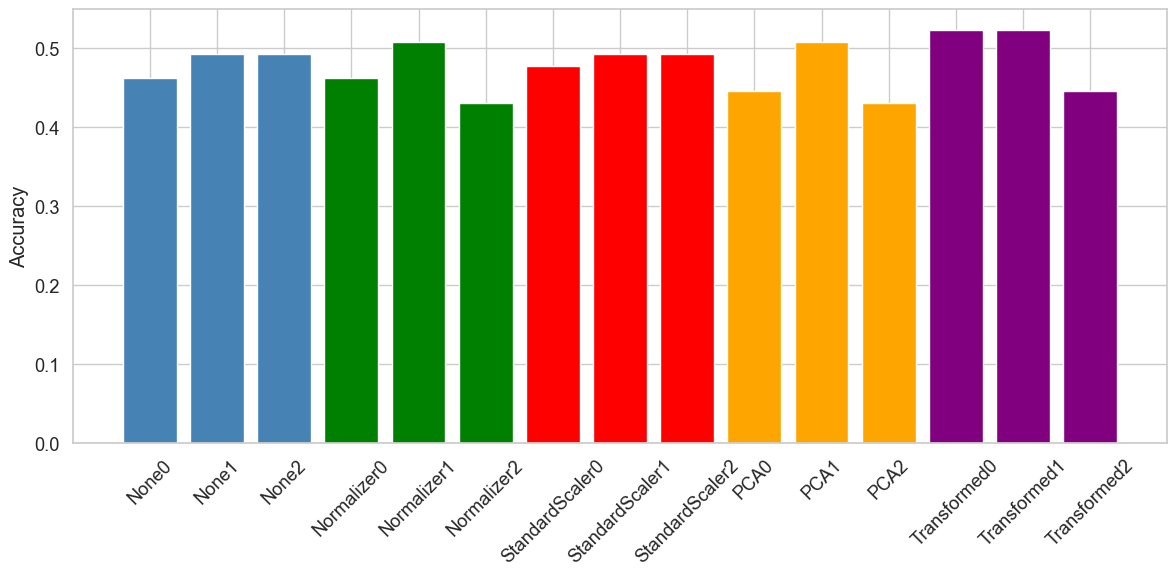

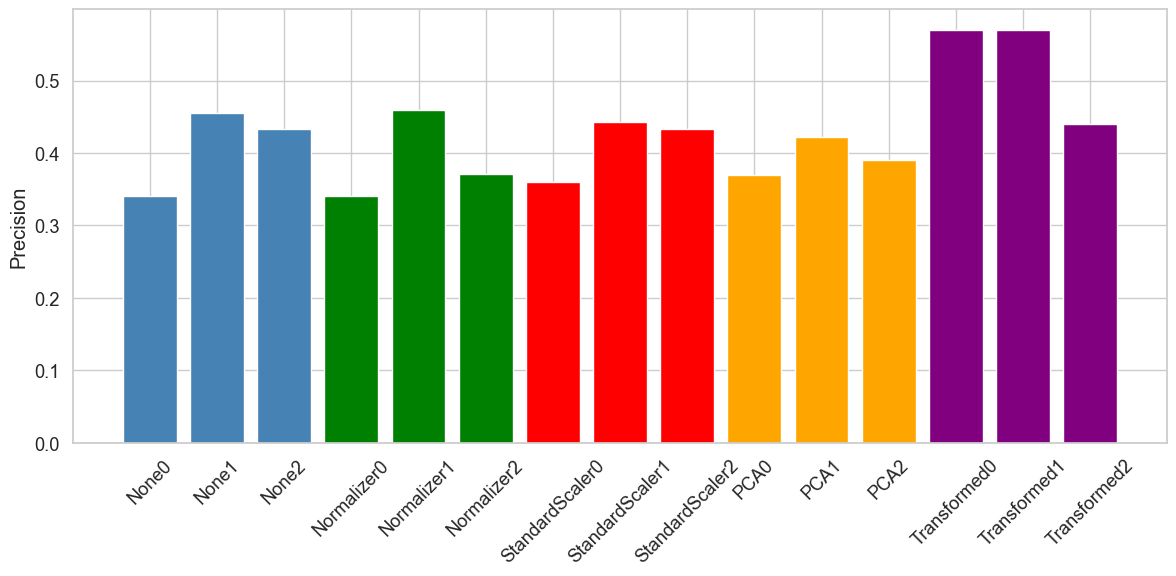

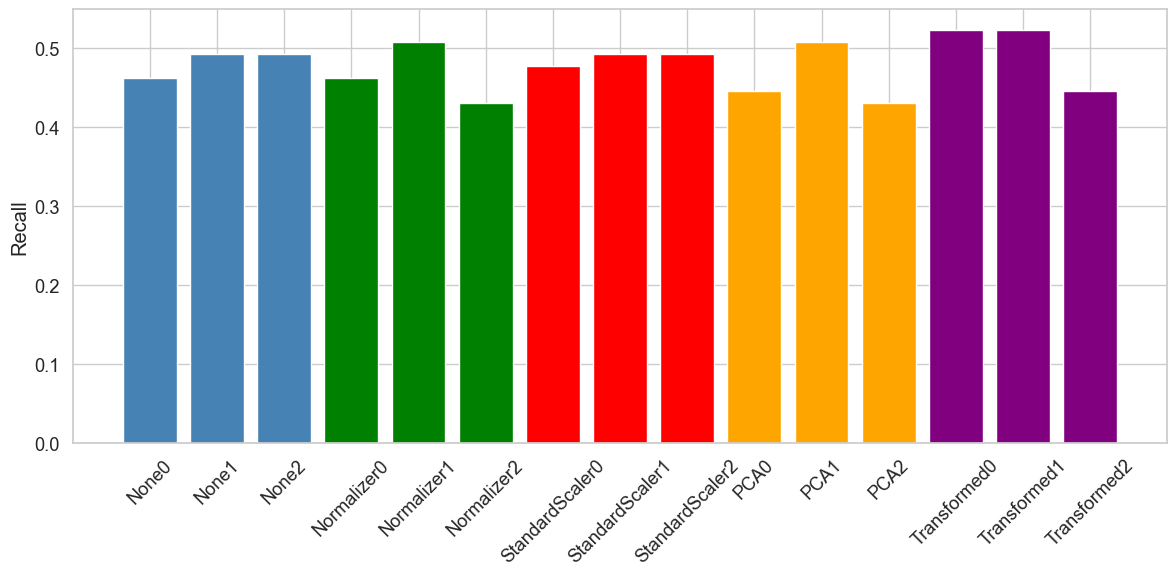

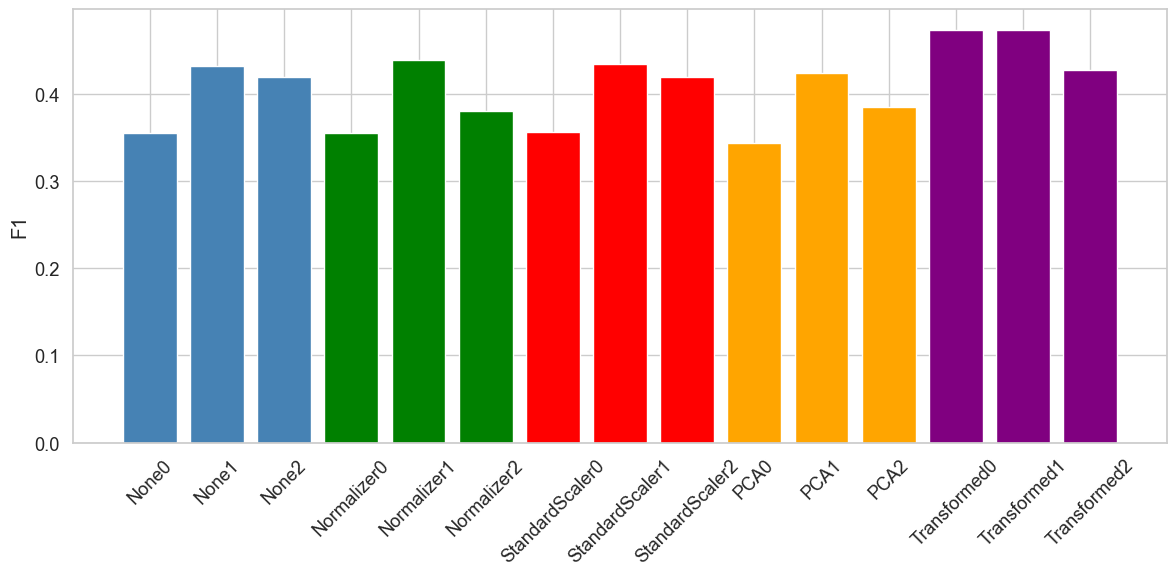

In [201]:

def show_table(title, results):
    print("\n\n\n")
    print("Klasyfikator   " + title + "     | Dokladnosc Precyzja   Czulosc  F1-score  |")
    print("-" * 70)
    for row in results:
        print("{:20s}  |  {:.6f}  {:.6f}  {:.6f}  {:.6f}  |".format(row[0], row[1], row[2], row[3], row[4]))

# create a dictionary of nb_params for eachg processing method
import numpy as np

var_smoothng_list =  np.logspace(0, -9, num=100)
# get first value of var_smoothng_list
var_smoothng_list[0]
# get last value of var_smoothng_list
var_smoothng_list[-1]

nb_params_dict = {
    'None': [var_smoothng_list[0],var_smoothng_list[11],var_smoothng_list[-1]],
    'Normalizer': [var_smoothng_list[0],var_smoothng_list[10],var_smoothng_list[-1]],
    'StandardScaler': [var_smoothng_list[0],var_smoothng_list[9],var_smoothng_list[-1]],
    'PCA': [var_smoothng_list[0],var_smoothng_list[10],var_smoothng_list[-1]],
    'Transformed' : [var_smoothng_list[0],var_smoothng_list[0],var_smoothng_list[-1]]
}

def create_classifiers_for_processed_data(nb_params):
    nb_classifiers = []
    
    for param in nb_params:
        nb = GaussianNB(var_smoothing=param)
        nb_classifiers.append(nb)

    return nb_classifiers
        

def run_nb():
    results = []

    for name, X_processed_train, X_processed_val, y_processed_train, y_processed_val in processing():
        for i, classifier in enumerate(create_classifiers_for_processed_data(nb_params_dict[name])):
            row = [name + str(i)]
            print(row)
            accuracy, precision, recall, f1 = train_and_test_model(X_processed_train, X_processed_val, y_processed_train, y_processed_val, classifier)
            row.extend([accuracy, precision, recall, f1])
            results.append(row)
    return results

# create list of names of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']


def plot_results(results, nr):
    plt.figure(figsize=(12, 6))
    scores = [row[nr] for row in results]
    hyperparameters = [row[0] for row in results]
    
    # Define a color palette
    colors = ['steelblue'] * 3 + ['green'] * 3 + ['red'] * 3 + ['orange'] * 3 + ['purple'] * 3
    
    # Plot the results with the corresponding colors
    plt.bar(hyperparameters, scores, color=colors)
    
    plt.ylabel(str(metrics[nr-1]))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



nb_results = run_nb()


# show_table('NB', nb_results)

# visualize results in a table



for i in range(1, 5):
    plot_results(nb_results, i)


In [203]:
pd.DataFrame(nb_results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1'])

Classifier  Accuracy  Precision    Recall        F1
0             None0  0.461538   0.341132  0.461538  0.354913
1             None1  0.492308   0.455000  0.492308  0.431603
2             None2  0.492308   0.432652  0.492308  0.418980
3       Normalizer0  0.461538   0.341132  0.461538  0.354913
4       Normalizer1  0.507692   0.459114  0.507692  0.438654
5       Normalizer2  0.430769   0.371331  0.430769  0.380155
6   StandardScaler0  0.476923   0.359994  0.476923  0.356231
7   StandardScaler1  0.492308   0.443287  0.492308  0.433926
8   StandardScaler2  0.492308   0.432652  0.492308  0.418980
9              PCA0  0.446154   0.370034  0.446154  0.343829
10             PCA1  0.507692   0.422786  0.507692  0.423883
11             PCA2  0.430769   0.389793  0.430769  0.384625
12     Transformed0  0.523077   0.570105  0.523077  0.473173
13     Transformed1  0.523077   0.570105  0.523077  0.473173
14     Transformed2  0.446154   0.440461  0.446154  0.427264

['None0']
['None1']
['None2']
['Normalizer0']
['Normalizer1']
['Normalizer2']
['StandardScaler0']
['StandardScaler1']
['StandardScaler2']
['PCA0']
['PCA1']
['PCA2']
['Transformed0']
['Transformed1']
['Transformed2']


C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: 

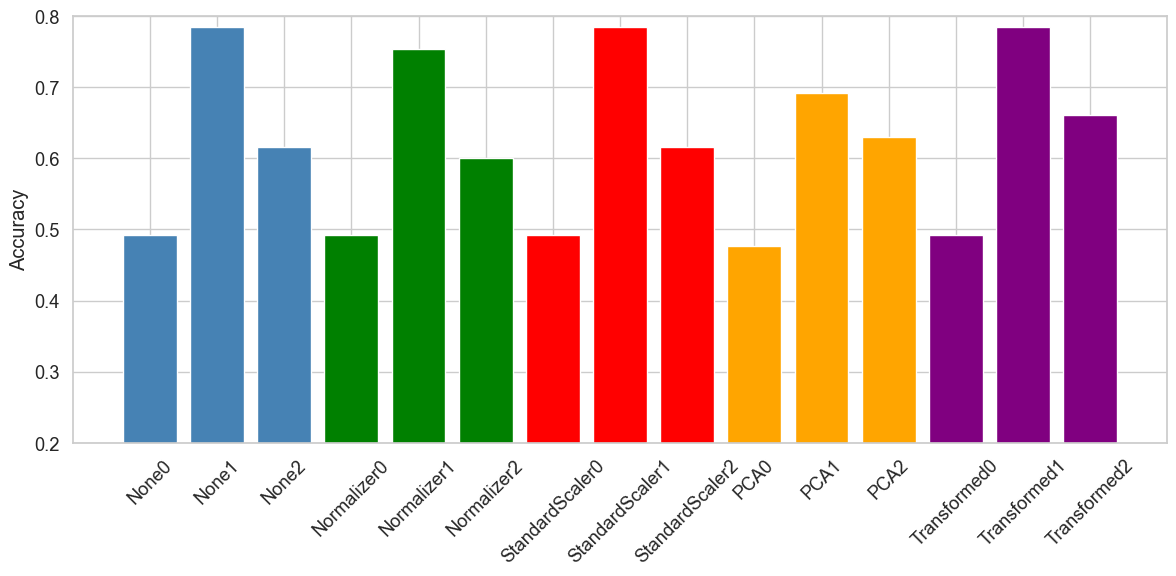

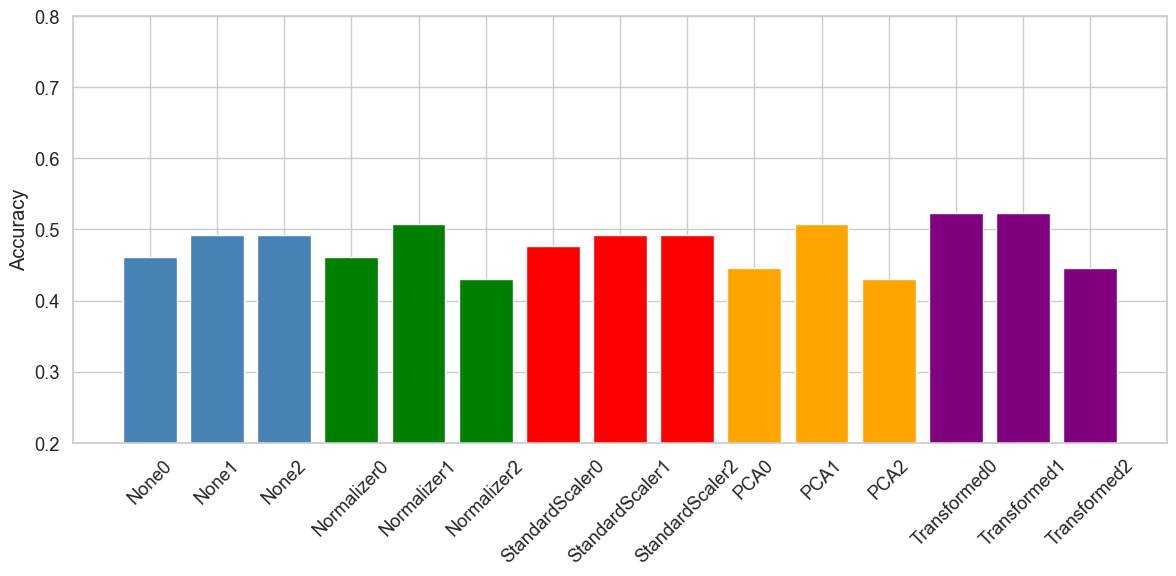

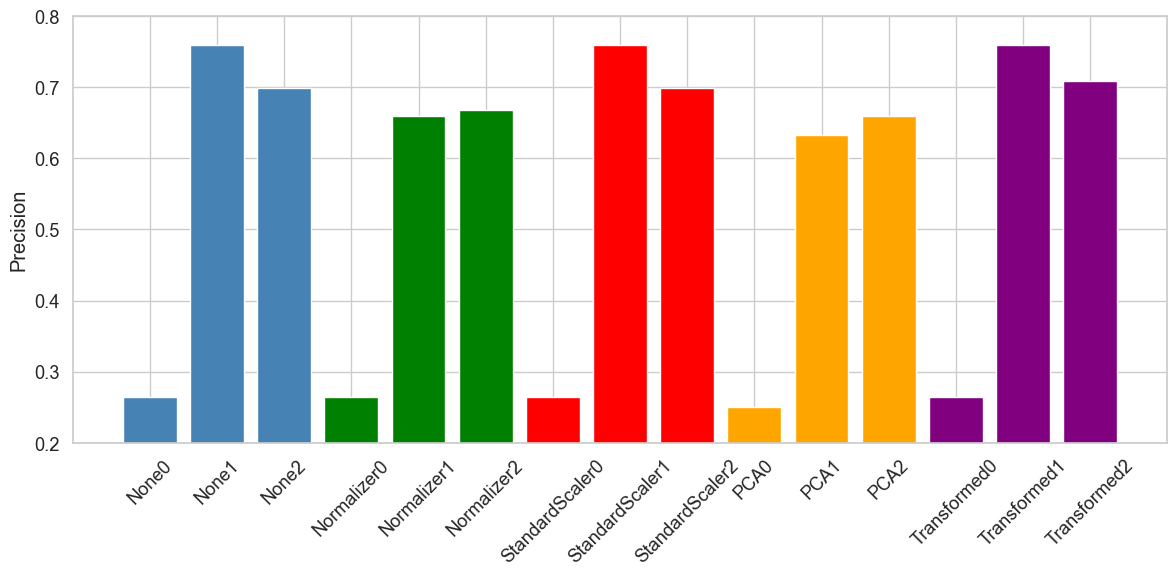

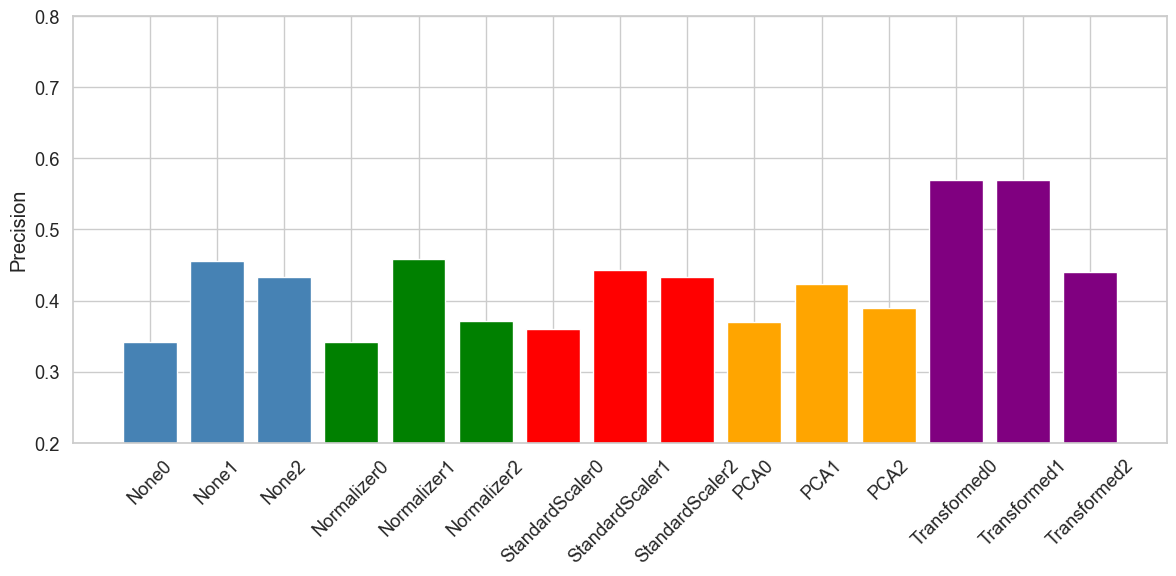

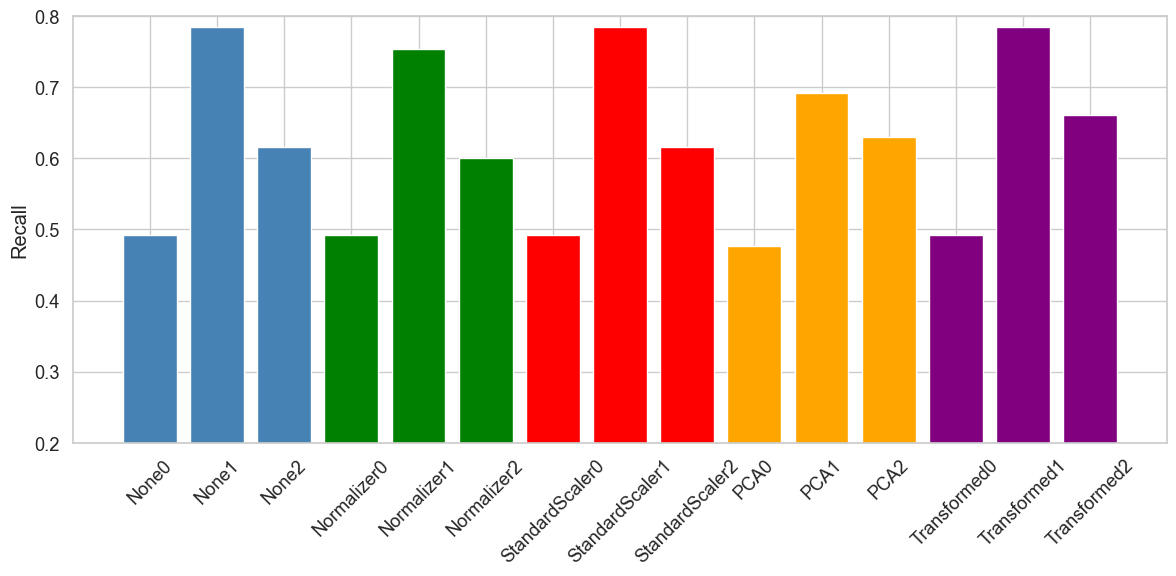

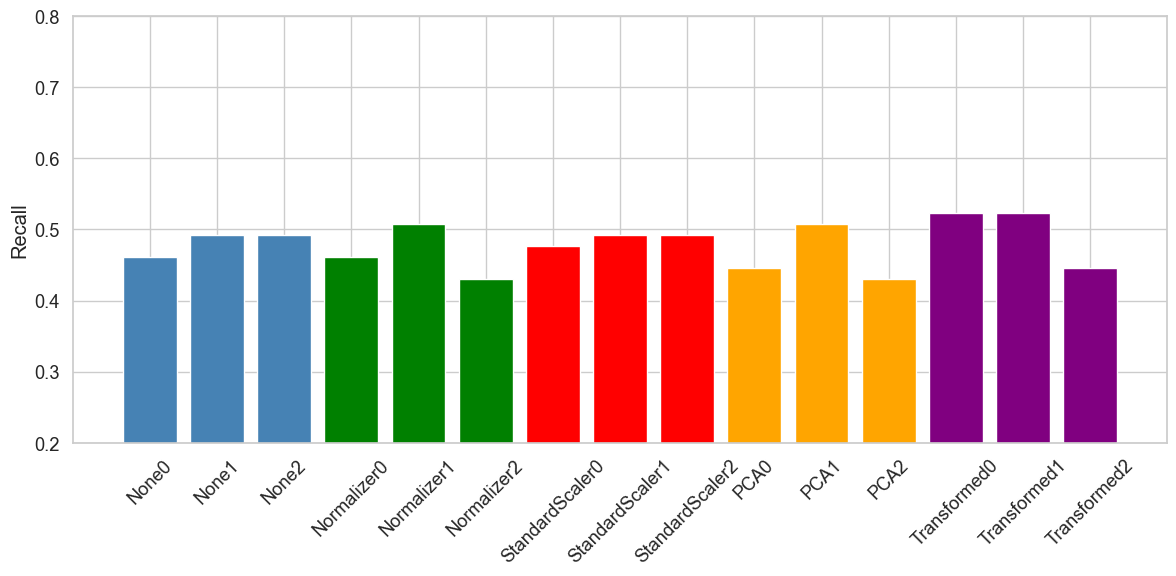

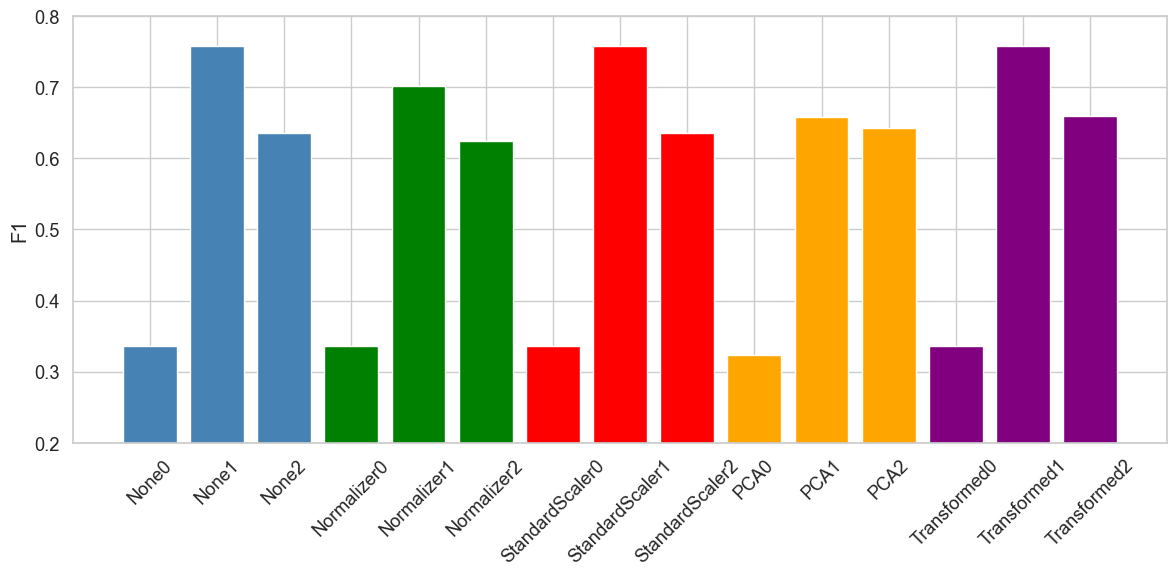

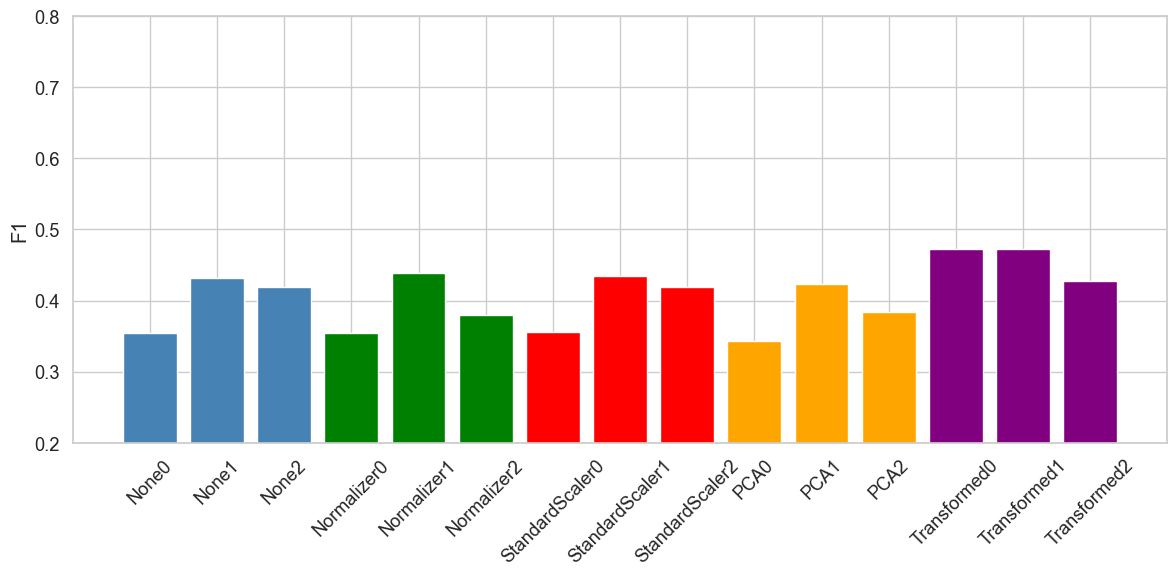

In [209]:
dt_params = []
for i in range(1, 15):
    dt_params.append({'max_depth': i, 'min_samples_split': 2, 'criterion': 'gini'})

dt_params_dict = {
    'None': [dt_params[0],dt_params[2],dt_params[-1]],
    'Normalizer': [dt_params[0],dt_params[2],dt_params[-1]],
    'StandardScaler': [dt_params[0],dt_params[2],dt_params[-1]],
    'PCA': [dt_params[0],dt_params[3],dt_params[-1]],
    'Transformed' : [dt_params[0],dt_params[2],dt_params[-1]]
}

def create_classifiers_for_processed_data_dt(params):
    dt_classifiers = []
    for params in params:
        dt = DecisionTreeClassifier(criterion=params.get('criterion'), max_depth=params.get('max_depth'),
                                    min_samples_split=params.get('min_samples_split'), random_state=0)
        dt_classifiers.append(dt)

    return dt_classifiers
        

def run_dt():
    results = []

    for name, X_processed_train, X_processed_val, y_processed_train, y_processed_val in processing():
        for i, classifier in enumerate(create_classifiers_for_processed_data_dt(dt_params_dict[name])):
            row = [name + str(i)]
            print(row)
            accuracy, precision, recall, f1 = train_and_test_model(X_processed_train, X_processed_val, y_processed_train, y_processed_val, classifier)
            row.extend([accuracy, precision, recall, f1])
            results.append(row)
    return results

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']


import seaborn as sns


def plot_results(results, nr):
    plt.figure(figsize=(12, 6))
    scores = [row[nr] for row in results]
    hyperparameters = [row[0] for row in results]
    
    # Define a color palette
    colors = ['steelblue'] * 3 + ['green'] * 3 + ['red'] * 3 + ['orange'] * 3 + ['purple'] * 3
    
    # Plot the results with the corresponding colors
    plt.bar(hyperparameters, scores, color=colors)
    
    plt.ylabel(str(metrics[nr-1]))
    plt.ylim(0.2, 0.8)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




dt_results = run_dt()


# show_table('NB', nb_results)

# visualize results in a table



for i in range(1, 5):
    plot_results(dt_results, i)
    plot_results(nb_results, i)

In [210]:
results = []
for i in range(0, 15):
        results.append([nb_results[i][0], nb_results[i][1], nb_results[i][2], nb_results[i][3], nb_results[i][4], dt_results[i][1], dt_results[i][2], dt_results[i][3], dt_results[i][4]])

# create a dataframe with results
df = pd.DataFrame(results, columns=['Classifier', 'Accuracy_NB', 'Precision_NB', 'Recall_NB', 'F1_NB', 'Accuracy_DT', 'Precision_DT', 'Recall_DT', 'F1_DT'])
df

Classifier  Accuracy_NB  Precision_NB  Recall_NB     F1_NB   
0             None0     0.461538      0.341132   0.461538  0.354913  \
1             None1     0.492308      0.455000   0.492308  0.431603   
2             None2     0.492308      0.432652   0.492308  0.418980   
3       Normalizer0     0.461538      0.341132   0.461538  0.354913   
4       Normalizer1     0.507692      0.459114   0.507692  0.438654   
5       Normalizer2     0.430769      0.371331   0.430769  0.380155   
6   StandardScaler0     0.476923      0.359994   0.476923  0.356231   
7   StandardScaler1     0.492308      0.443287   0.492308  0.433926   
8   StandardScaler2     0.492308      0.432652   0.492308  0.418980   
9              PCA0     0.446154      0.370034   0.446154  0.343829   
10             PCA1     0.507692      0.422786   0.507692  0.423883   
11             PCA2     0.430769      0.389793   0.430769  0.384625   
12     Transformed0     0.523077      0.570105   0.523077  0.473173   
13     Transformed1     0.523077      0.570105   0.523077  0.473173   
14     Transformed2     0.446154      0.440461   0.446154  0.427264   

    Accuracy_DT  Precision_DT  Recall_DT     F1_DT  
0      0.492308      0.263999   0.492308  0.336004  
1      0.784615      0.759318   0.784615  0.757769  
2      0.615385      0.698445   0.615385  0.635385  
3      0.492308      0.263999   0.492308  0.336004  
4      0.753846      0.660295   0.753846  0.701538  
5      0.600000      0.668159   0.600000  0.624908  
6      0.492308      0.263999   0.492308  0.336004  
7      0.784615      0.759318   0.784615  0.757769  
8      0.615385      0.698445   0.615385  0.635385  
9      0.476923      0.250726   0.476923  0.323540  
10     0.692308      0.633210   0.692308  0.658786  
11     0.630769      0.659302   0.630769  0.643370  
12     0.492308      0.263999   0.492308  0.336004  
13     0.784615      0.759318   0.784615  0.757769  
14     0.661538      0.708563   0.661538  0.659405

<Axes: xlabel='Classifier'>

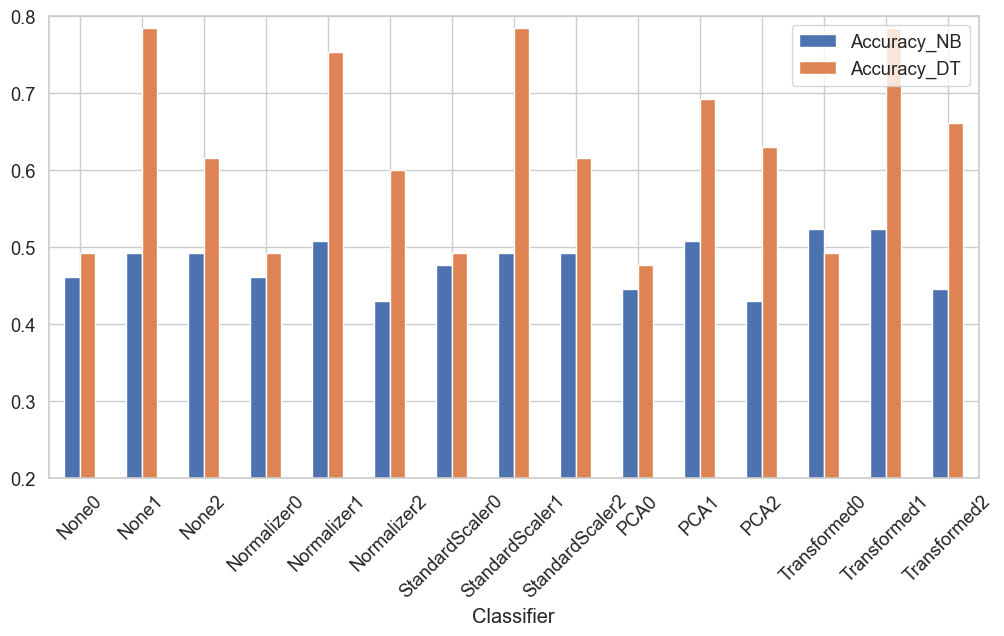

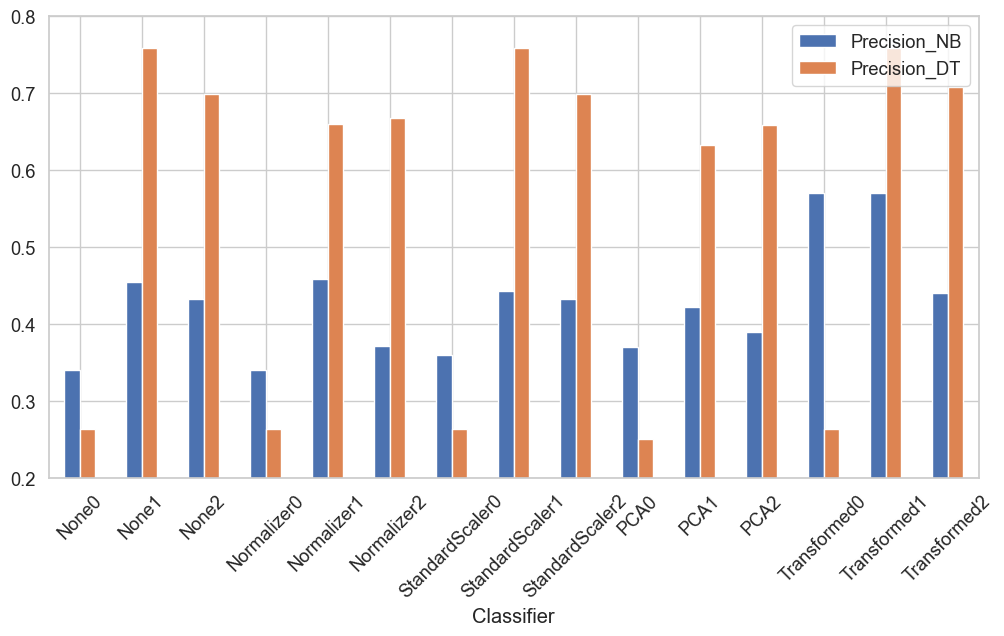

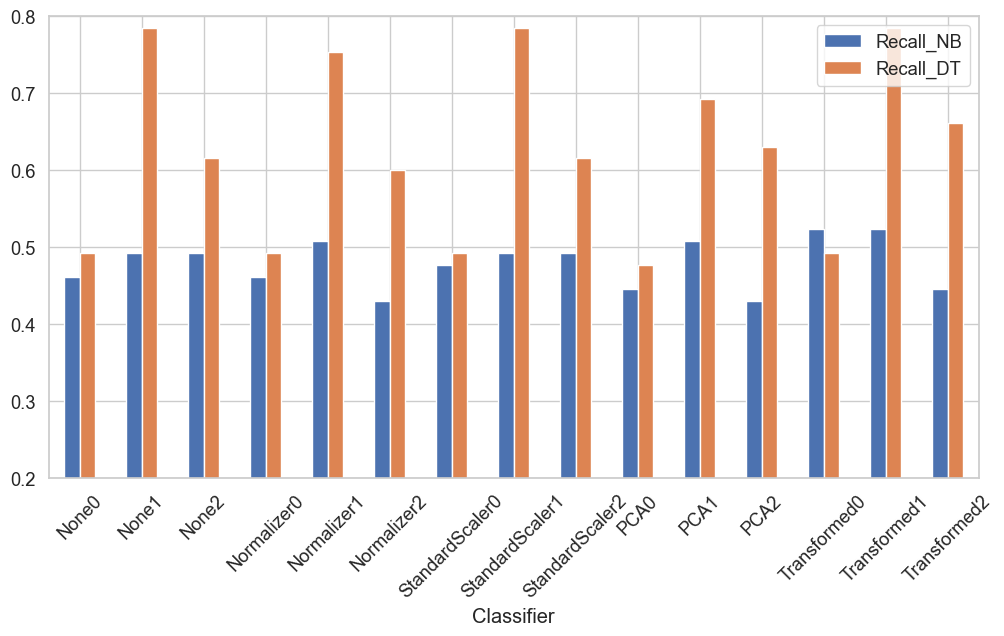

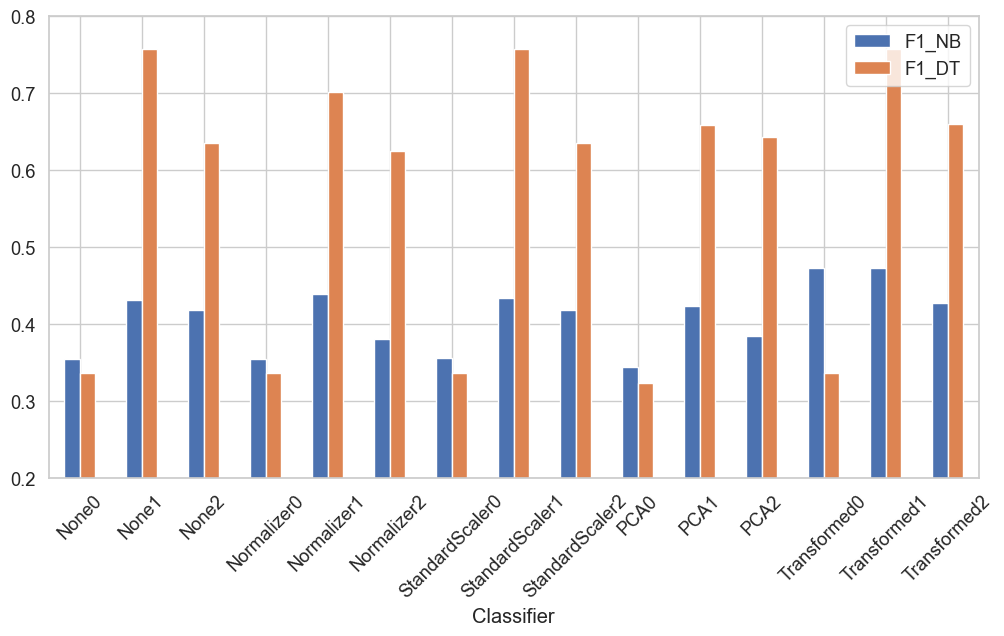

In [211]:

# visualize df with results in a bar plot of each accuracy, precision, recall and f1 lim y from 0.2 to 0.8
df.plot.bar(x='Classifier', y=['Accuracy_NB', 'Accuracy_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)
df.plot.bar(x='Classifier', y=['Precision_NB', 'Precision_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)
df.plot.bar(x='Classifier', y=['Recall_NB', 'Recall_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)
df.plot.bar(x='Classifier', y=['F1_NB', 'F1_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)



In [212]:
results = []
for i in range(0, 15):
    # add only with '1' in the name
    if '1' in nb_results[i][0]:
        results.append([nb_results[i][0], nb_results[i][1], nb_results[i][2], nb_results[i][3], nb_results[i][4], dt_results[i][1], dt_results[i][2], dt_results[i][3], dt_results[i][4]])

# create a dataframe with results
df = pd.DataFrame(results, columns=['Classifier', 'Accuracy_NB', 'Precision_NB', 'Recall_NB', 'F1_NB', 'Accuracy_DT', 'Precision_DT', 'Recall_DT', 'F1_DT'])
df

Classifier  Accuracy_NB  Precision_NB  Recall_NB     F1_NB   
0            None1     0.492308      0.455000   0.492308  0.431603  \
1      Normalizer1     0.507692      0.459114   0.507692  0.438654   
2  StandardScaler1     0.492308      0.443287   0.492308  0.433926   
3             PCA1     0.507692      0.422786   0.507692  0.423883   
4     Transformed1     0.523077      0.570105   0.523077  0.473173   

   Accuracy_DT  Precision_DT  Recall_DT     F1_DT  
0     0.784615      0.759318   0.784615  0.757769  
1     0.753846      0.660295   0.753846  0.701538  
2     0.784615      0.759318   0.784615  0.757769  
3     0.692308      0.633210   0.692308  0.658786  
4     0.784615      0.759318   0.784615  0.757769

<Axes: xlabel='Classifier'>

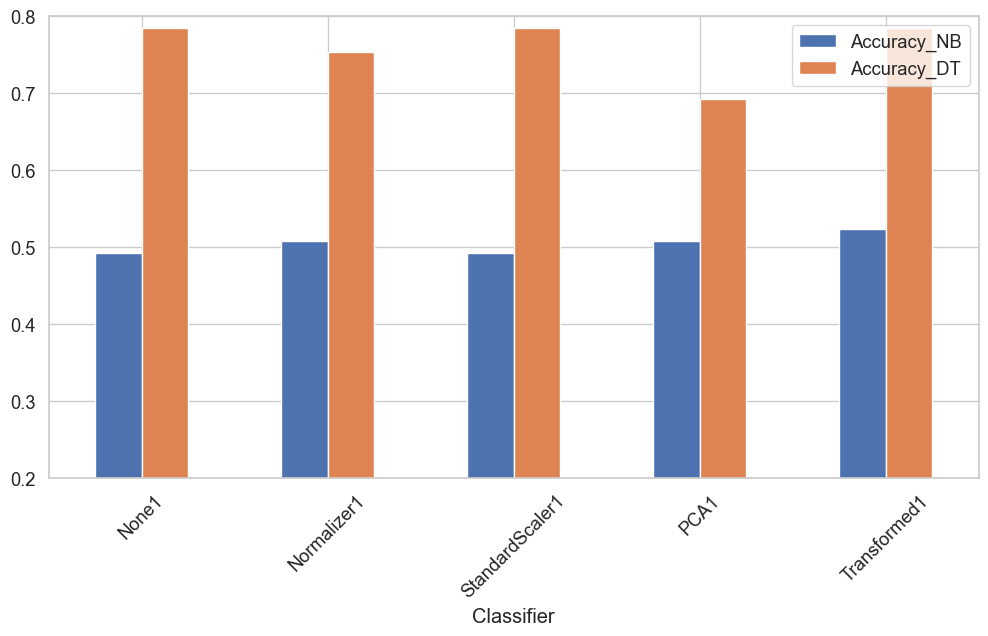

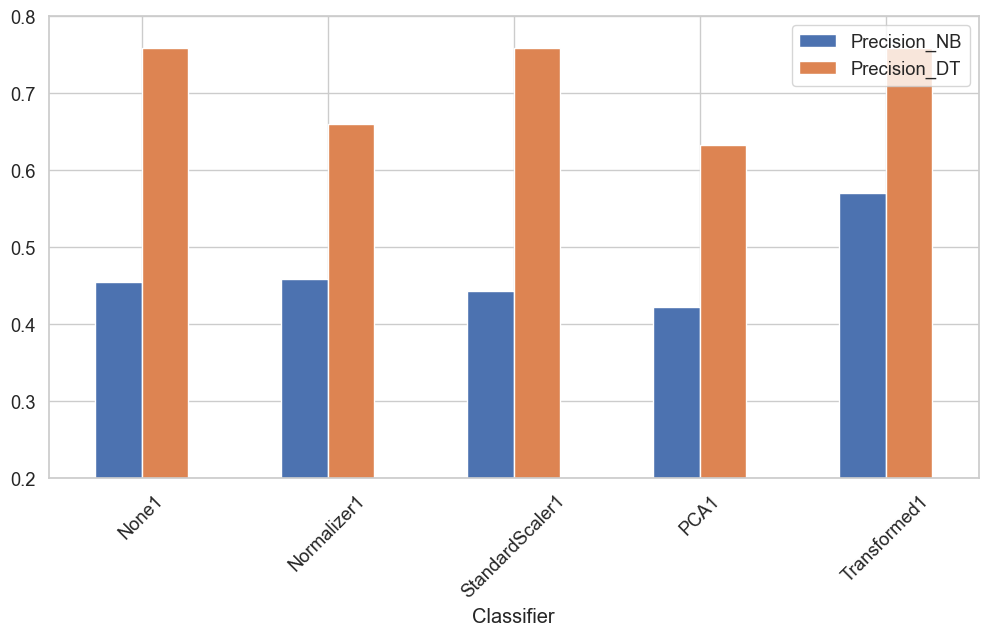

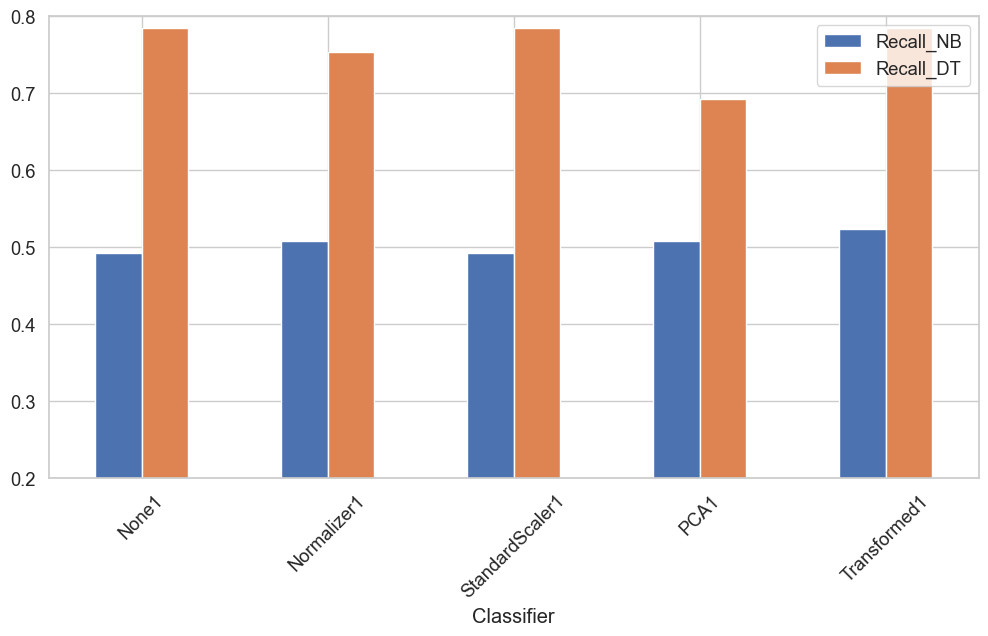

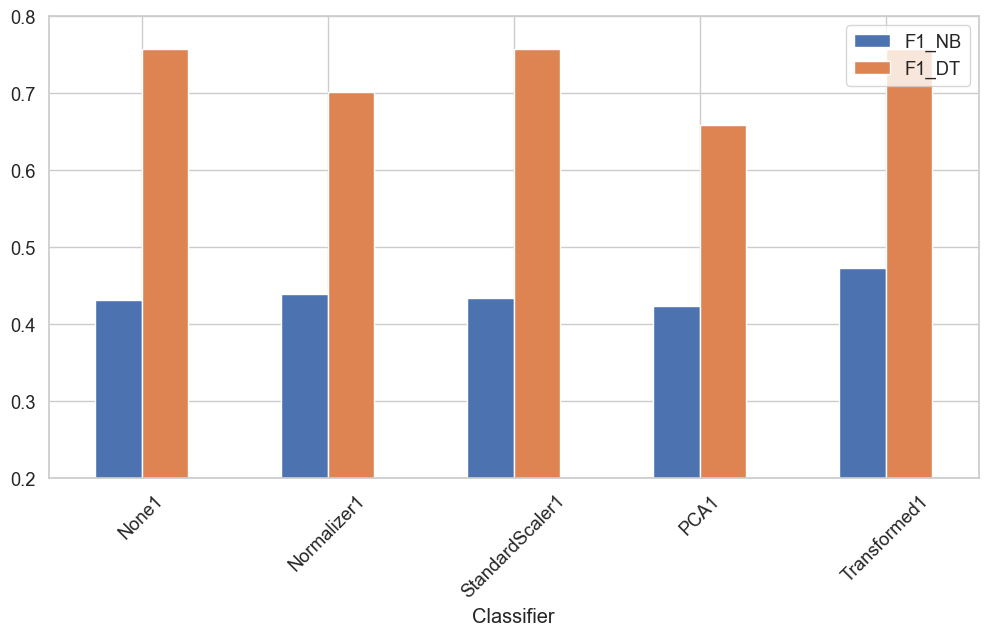

In [213]:
# compare dt_results and nb_results in one chart of only lst row in df
df.plot.bar(x='Classifier', y=['Accuracy_NB', 'Accuracy_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)
df.plot.bar(x='Classifier', y=['Precision_NB', 'Precision_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)
df.plot.bar(x='Classifier', y=['Recall_NB', 'Recall_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)
df.plot.bar(x='Classifier', y=['F1_NB', 'F1_DT'], ylim=(0.2, 0.8), figsize=(12, 6), rot=45)


In [214]:
# in accuracy_nb store the accuracy for nb from df
accuracy_nb = df['Accuracy_NB'][4]
accuracy_dt = df['Accuracy_DT'][4]

precision_nb = df['Precision_NB'][4]
precision_dt = df['Precision_DT'][4]

recall_nb = df['Recall_NB'][4]
recall_dt = df['Recall_DT'][4]

f1_nb = df['F1_NB'][4]
f1_dt = df['F1_DT'][4]


In [215]:
results = pd.DataFrame({'Accuracy': [accuracy_nb, accuracy_dt],
                        'Precision': [precision_nb, precision_dt],
                        'Recall': [recall_nb, recall_dt],
                        'F1': [f1_nb, f1_dt]},
                        index=['Naive Bayes', 'Decision Tree'])
results


Accuracy  Precision    Recall        F1
Naive Bayes    0.523077   0.570105  0.523077  0.473173
Decision Tree  0.784615   0.759318  0.784615  0.757769

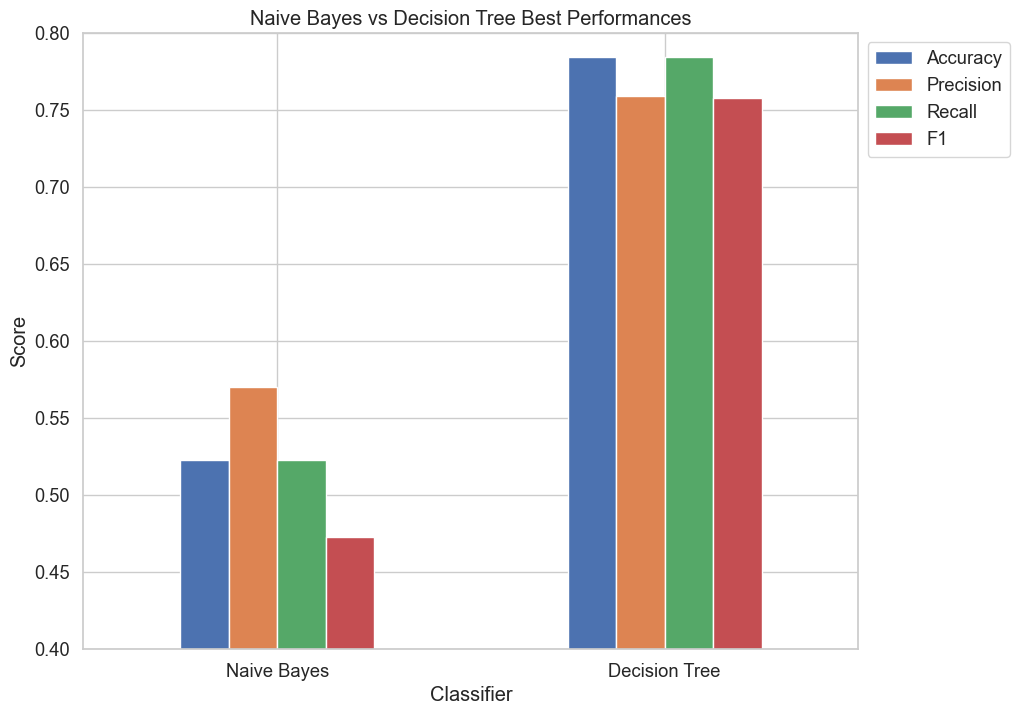

In [216]:

# visualise it in a bar chart
results.plot(kind='bar', figsize=(10, 8))
plt.title('Naive Bayes vs Decision Tree Best Performances')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.ylim(0.4, 0.8)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.0, 1.0))